In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from warnings import filterwarnings
filterwarnings('ignore')

In [168]:
df = pd.read_csv('.\data\SCMS_Delivery_History_Dataset.csv')

In [169]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [170]:
df.tail()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03
10323,86823,103-ZW-T30,FPQ-15197,SO-50022,DN-4336,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,36639,72911.61,1.99,0.03,"Cipla, Goa, India",No,Weight Captured Separately,Freight Included in Commodity Cost,85.82


In [171]:
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(" ","_")
df.columns

Index(['id', 'project_code', 'pq_#', 'po_/_so_#', 'asn/dn_#', 'country',
       'managed_by', 'fulfill_via', 'vendor_inco_term', 'shipment_mode',
       'pq_first_sent_to_client_date', 'po_sent_to_vendor_date',
       'scheduled_delivery_date', 'delivered_to_client_date',
       'delivery_recorded_date', 'product_group', 'sub_classification',
       'vendor', 'item_description', 'molecule/test_type', 'brand', 'dosage',
       'dosage_form', 'unit_of_measure_(per_pack)', 'line_item_quantity',
       'line_item_value', 'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_(kilograms)', 'freight_cost_(usd)',
       'line_item_insurance_(usd)'],
      dtype='object')

In [172]:
df.shape

(10324, 33)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            10324 non-null  int64  
 1   project_code                  10324 non-null  object 
 2   pq_#                          10324 non-null  object 
 3   po_/_so_#                     10324 non-null  object 
 4   asn/dn_#                      10324 non-null  object 
 5   country                       10324 non-null  object 
 6   managed_by                    10324 non-null  object 
 7   fulfill_via                   10324 non-null  object 
 8   vendor_inco_term              10324 non-null  object 
 9   shipment_mode                 9964 non-null   object 
 10  pq_first_sent_to_client_date  10324 non-null  object 
 11  po_sent_to_vendor_date        10324 non-null  object 
 12  scheduled_delivery_date       10324 non-null  object 
 13  d

In [174]:
df.isnull().sum()

id                                 0
project_code                       0
pq_#                               0
po_/_so_#                          0
asn/dn_#                           0
country                            0
managed_by                         0
fulfill_via                        0
vendor_inco_term                   0
shipment_mode                    360
pq_first_sent_to_client_date       0
po_sent_to_vendor_date             0
scheduled_delivery_date            0
delivered_to_client_date           0
delivery_recorded_date             0
product_group                      0
sub_classification                 0
vendor                             0
item_description                   0
molecule/test_type                 0
brand                              0
dosage                          1736
dosage_form                        0
unit_of_measure_(per_pack)         0
line_item_quantity                 0
line_item_value                    0
pack_price                         0
u

In [175]:
df.duplicated().sum()

0

In [176]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10324.0,51098.968229,31944.332496,1.0,12795.7500,57540.500,83648.2500,86823.00
unit_of_measure_(per_pack),10324.0,77.990895,76.579764,1.0,30.0000,60.000,90.0000,1000.00
line_item_quantity,10324.0,18332.534870,40035.302961,1.0,408.0000,3000.000,17039.7500,619999.00
line_item_value,10324.0,157650.567347,345292.066979,0.0,4314.5925,30471.465,166447.1400,5951990.40
pack_price,10324.0,21.910241,45.609223,0.0,4.1200,9.300,23.5925,1345.64
unit_price,10324.0,0.611701,3.275808,0.0,0.0800,0.160,0.4700,238.65
line_item_insurance_(usd),10037.0,240.117626,500.190568,0.0,6.5100,47.040,252.4000,7708.44


In [177]:
df.describe(include=object).T

,count,unique,top,freq
project_code,10324,142,116-ZA-T30,768
pq_#,10324,1237,Pre-PQ Process,2681
po_/_so_#,10324,6233,SCMS-199289,67
asn/dn_#,10324,7030,ASN-19166,54
country,10324,43,South Africa,1406
managed_by,10324,4,PMO - US,10265
fulfill_via,10324,2,From RDC,5404
vendor_inco_term,10324,8,N/A - From RDC,5404
shipment_mode,9964,4,Air,6113
pq_first_sent_to_client_date,10324,765,Pre-PQ Process,2476


In [178]:
df.drop(["id","project_code","pq_#"],axis=1,inplace=True)

In [179]:
num_col  = df.select_dtypes(exclude='object').columns.to_list()
num_col

['unit_of_measure_(per_pack)',
 'line_item_quantity',
 'line_item_value',
 'pack_price',
 'unit_price',
 'line_item_insurance_(usd)']

In [180]:
def analysis(column):
    print("Description of " + column)
    print("-"*70)
    print(df[column].describe(),end='\n')
    
    print("\n Histogram and Boxplot of " + column)
    print("-"*70)
    fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(14,5))
    print(sns.histplot(df[column], kde=True, color='c', ax=axs[0]))
    print(sns.boxplot(x=df[column], ax=axs[1],color='r'))
    plt.show()
    

Description of unit_of_measure_(per_pack)
----------------------------------------------------------------------
count    10324.000000
mean        77.990895
std         76.579764
min          1.000000
25%         30.000000
50%         60.000000
75%         90.000000
max       1000.000000
Name: unit_of_measure_(per_pack), dtype: float64

 Histogram and Boxplot of unit_of_measure_(per_pack)
----------------------------------------------------------------------
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


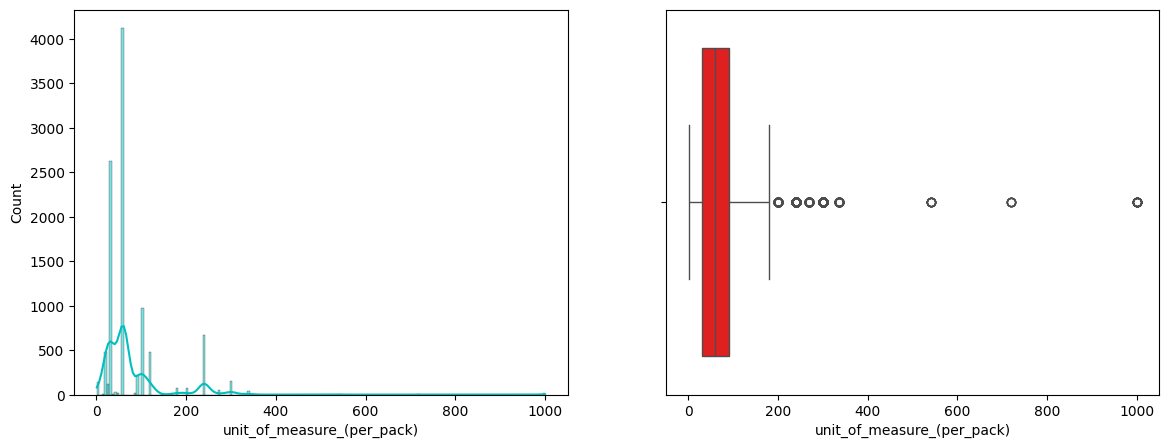

None
Description of line_item_quantity
----------------------------------------------------------------------
count     10324.000000
mean      18332.534870
std       40035.302961
min           1.000000
25%         408.000000
50%        3000.000000
75%       17039.750000
max      619999.000000
Name: line_item_quantity, dtype: float64

 Histogram and Boxplot of line_item_quantity
----------------------------------------------------------------------
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


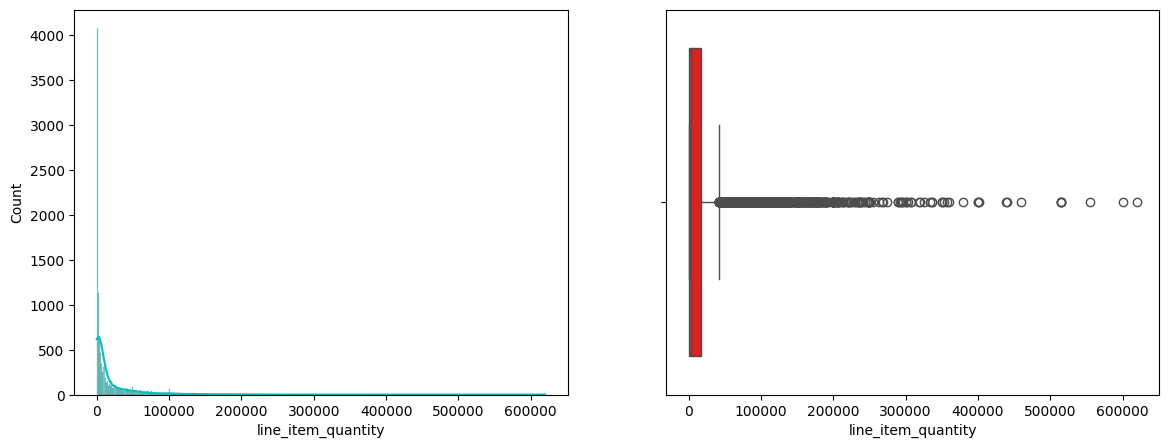

None
Description of line_item_value
----------------------------------------------------------------------
count    1.032400e+04
mean     1.576506e+05
std      3.452921e+05
min      0.000000e+00
25%      4.314593e+03
50%      3.047147e+04
75%      1.664471e+05
max      5.951990e+06
Name: line_item_value, dtype: float64

 Histogram and Boxplot of line_item_value
----------------------------------------------------------------------
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


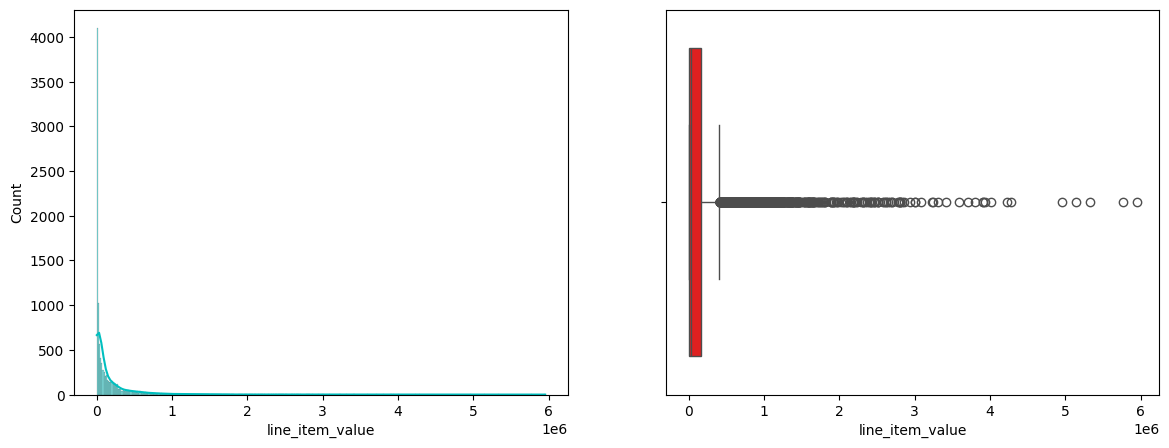

None
Description of pack_price
----------------------------------------------------------------------
count    10324.000000
mean        21.910241
std         45.609223
min          0.000000
25%          4.120000
50%          9.300000
75%         23.592500
max       1345.640000
Name: pack_price, dtype: float64

 Histogram and Boxplot of pack_price
----------------------------------------------------------------------
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


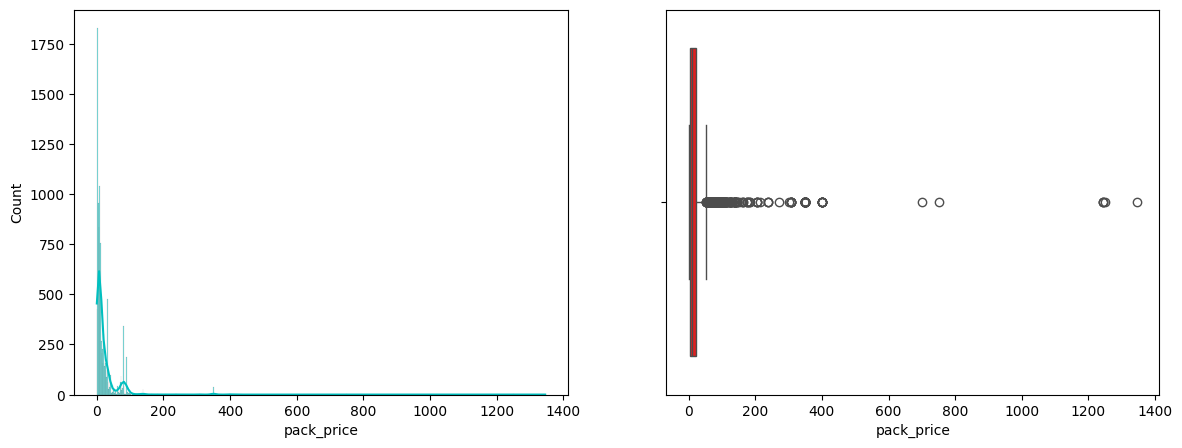

None
Description of unit_price
----------------------------------------------------------------------
count    10324.000000
mean         0.611701
std          3.275808
min          0.000000
25%          0.080000
50%          0.160000
75%          0.470000
max        238.650000
Name: unit_price, dtype: float64

 Histogram and Boxplot of unit_price
----------------------------------------------------------------------
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


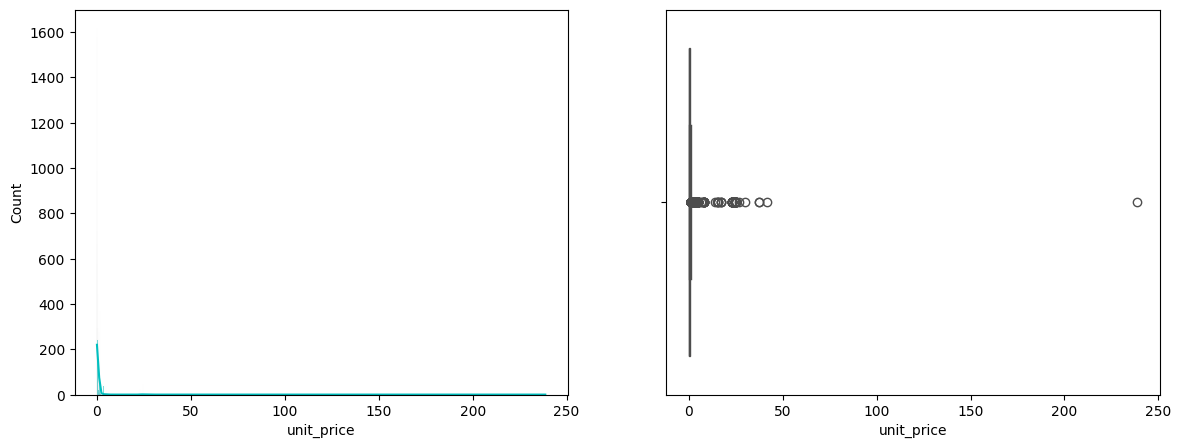

None
Description of line_item_insurance_(usd)
----------------------------------------------------------------------
count    10037.000000
mean       240.117626
std        500.190568
min          0.000000
25%          6.510000
50%         47.040000
75%        252.400000
max       7708.440000
Name: line_item_insurance_(usd), dtype: float64

 Histogram and Boxplot of line_item_insurance_(usd)
----------------------------------------------------------------------
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


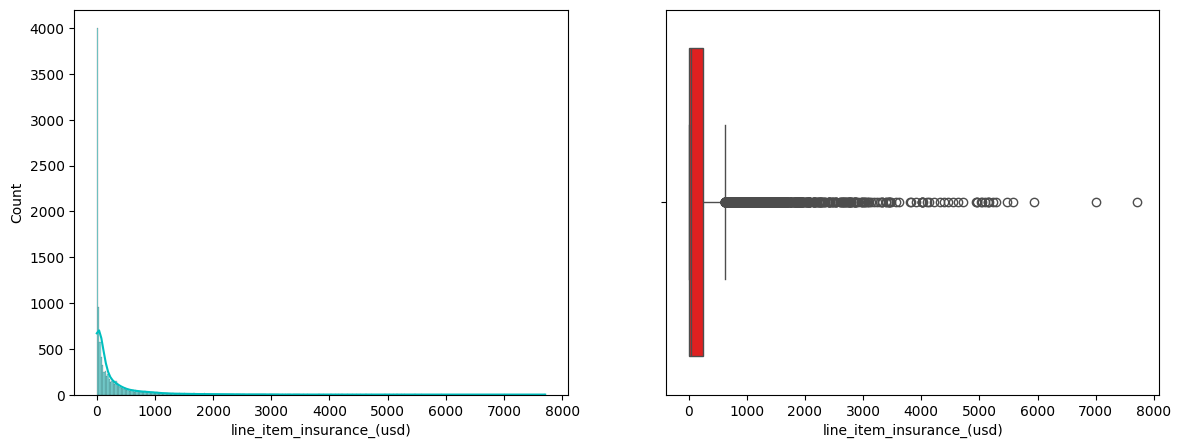

None


In [181]:
for col in num_col:
    print(analysis(col))

### Shipment Mode

In [182]:
def plot(col):
    
    df[col].value_counts().plot.bar()
    plt.title("bar plot for {} column".format(col))
    plt.show()

    df[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title("pie chart for {} column".format(col))
    plt.tight_layout()
    plt.show()

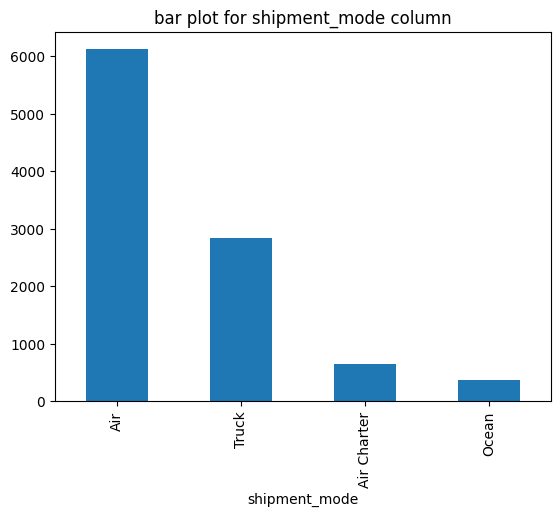

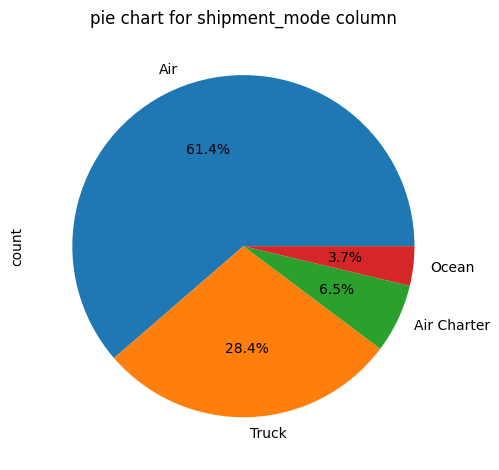

In [183]:
plot('shipment_mode')

### Dosage

Text(0.5, 1.0, 'dosage valuecounts in bar chart')

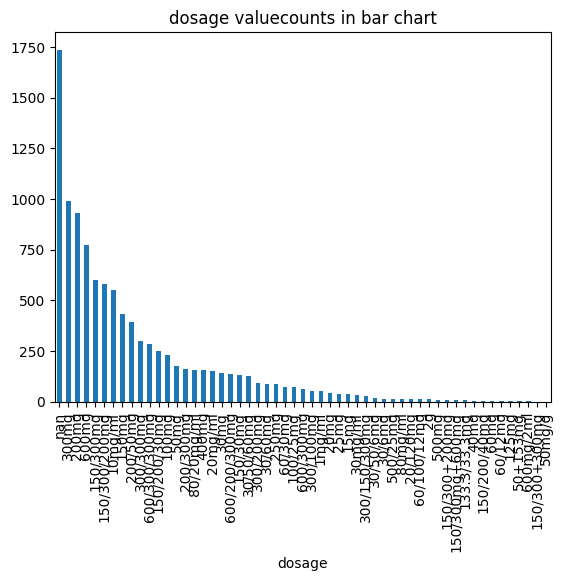

In [184]:
df["dosage"].value_counts(dropna=False).plot.bar()
plt.title("dosage valuecounts in bar chart")

fill nan values

In [185]:
df['shipment_mode'].fillna("Air",inplace=True)
df.drop('dosage',inplace=True,axis=1)
df["line_item_insurance_(usd)"].replace(to_replace = np.NaN, value = df["line_item_insurance_(usd)"].median(),inplace=True)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   po_/_so_#                     10324 non-null  object 
 1   asn/dn_#                      10324 non-null  object 
 2   country                       10324 non-null  object 
 3   managed_by                    10324 non-null  object 
 4   fulfill_via                   10324 non-null  object 
 5   vendor_inco_term              10324 non-null  object 
 6   shipment_mode                 10324 non-null  object 
 7   pq_first_sent_to_client_date  10324 non-null  object 
 8   po_sent_to_vendor_date        10324 non-null  object 
 9   scheduled_delivery_date       10324 non-null  object 
 10  delivered_to_client_date      10324 non-null  object 
 11  delivery_recorded_date        10324 non-null  object 
 12  product_group                 10324 non-null  object 
 13  s

In [187]:
cat_cal = df.select_dtypes(include='object').columns
cat_cal

Index(['po_/_so_#', 'asn/dn_#', 'country', 'managed_by', 'fulfill_via',
       'vendor_inco_term', 'shipment_mode', 'pq_first_sent_to_client_date',
       'po_sent_to_vendor_date', 'scheduled_delivery_date',
       'delivered_to_client_date', 'delivery_recorded_date', 'product_group',
       'sub_classification', 'vendor', 'item_description',
       'molecule/test_type', 'brand', 'dosage_form', 'manufacturing_site',
       'first_line_designation', 'weight_(kilograms)', 'freight_cost_(usd)'],
      dtype='object')

In [188]:
for col in cat_cal:
    print(f"{col} : {len(df[col].unique())}")

po_/_so_# : 6233
asn/dn_# : 7030
country : 43
managed_by : 4
fulfill_via : 2
vendor_inco_term : 8
shipment_mode : 4
pq_first_sent_to_client_date : 765
po_sent_to_vendor_date : 897
scheduled_delivery_date : 2006
delivered_to_client_date : 2093
delivery_recorded_date : 2042
product_group : 5
sub_classification : 6
vendor : 73
item_description : 184
molecule/test_type : 86
brand : 48
dosage_form : 17
manufacturing_site : 88
first_line_designation : 2
weight_(kilograms) : 4688
freight_cost_(usd) : 6733


### PO/SO

In [189]:
df["po_/_so_#"].value_counts()

po_/_so_#
SCMS-199289    67
SCMS-199283    63
SCMS-183950    55
SCMS-215370    38
SCMS-259075    38
               ..
SCMS-260830     1
SCMS-283040     1
SCMS-149030     1
SCMS-234070     1
SO-51680        1
Name: count, Length: 6233, dtype: int64

In [190]:
def reorder(df):
    df_split = df.split('-')
    df_return = df_split[0]
    return df_return

In [191]:
df['po_/_so_#'] = df['po_/_so_#'].apply(reorder)
df["po_/_so_#"].value_counts()

po_/_so_#
SO      5404
SCMS    4919
DSCM       1
Name: count, dtype: int64

In [192]:
df["po_/_so_#"]=df["po_/_so_#"].replace('DSCM',"SO")
df["po_/_so_#"].value_counts()

po_/_so_#
SO      5405
SCMS    4919
Name: count, dtype: int64

### DN/ASN

In [193]:
df["asn/dn_#"].value_counts()

asn/dn_#
ASN-19166    54
ASN-24415    38
ASN-23875    26
ASN-32138    19
ASN-28034    17
             ..
ASN-11200     1
ASN-23000     1
ASN-19497     1
ASN-24569     1
DN-4334       1
Name: count, Length: 7030, dtype: int64

In [194]:
df["asn/dn_#"]=df["asn/dn_#"].apply(reorder)
df["asn/dn_#"].value_counts()

asn/dn_#
DN     5404
ASN    4920
Name: count, dtype: int64

### Country

In [195]:
print(df["country"].value_counts())


country
South Africa          1406
Nigeria               1194
Côte d'Ivoire         1083
Uganda                 779
Vietnam                688
Zambia                 683
Haiti                  655
Mozambique             631
Zimbabwe               538
Tanzania               519
Rwanda                 430
Congo, DRC             333
Guyana                 237
Ethiopia               216
South Sudan            164
Kenya                  111
Burundi                 98
Namibia                 95
Cameroon                75
Botswana                70
Ghana                   58
Dominican Republic      52
Sudan                   46
Swaziland               35
Mali                    17
Guatemala               15
Pakistan                15
Malawi                  14
Benin                   13
Lebanon                  8
Libya                    8
Angola                   7
Liberia                  6
Sierra Leone             4
Lesotho                  4
Senegal                  3
Togo                

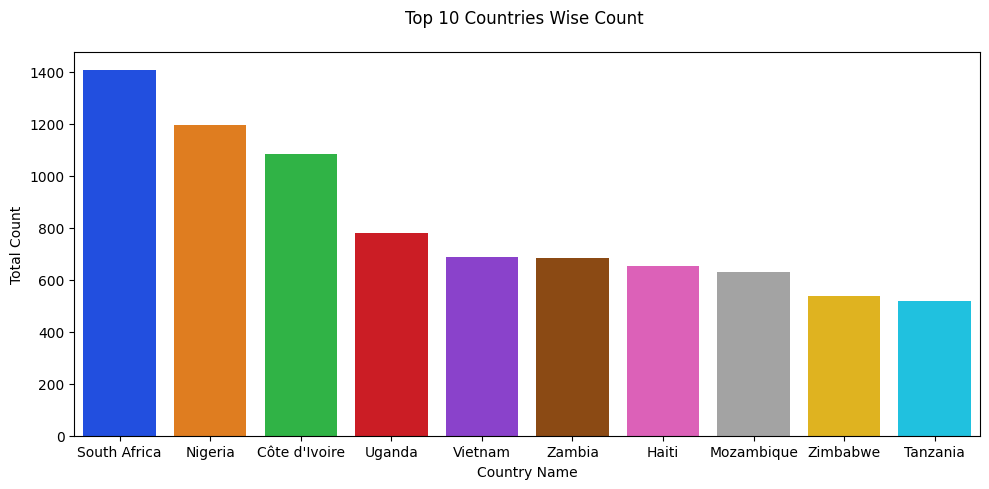

In [196]:
Count = df["country"].value_counts().nlargest(10)
plt.figure(figsize=(10,5))
sns.countplot(x=df['country'],order = Count.index,palette='bright')
plt.title('Top 10 Countries Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('Country Name')
plt.tight_layout()

### Managed by

In [197]:
df["managed_by"].value_counts()

managed_by
PMO - US                     10265
South Africa Field Office       57
Haiti Field Office               1
Ethiopia Field Office            1
Name: count, dtype: int64

In [198]:
np.round(df["managed_by"].value_counts(normalize=True)*100,2)

managed_by
PMO - US                     99.43
South Africa Field Office     0.55
Haiti Field Office            0.01
Ethiopia Field Office         0.01
Name: proportion, dtype: float64

In [199]:
df.drop("managed_by",axis=1,inplace=True)

### Fulfill_via

In [200]:
df["fulfill_via"].value_counts()

fulfill_via
From RDC       5404
Direct Drop    4920
Name: count, dtype: int64

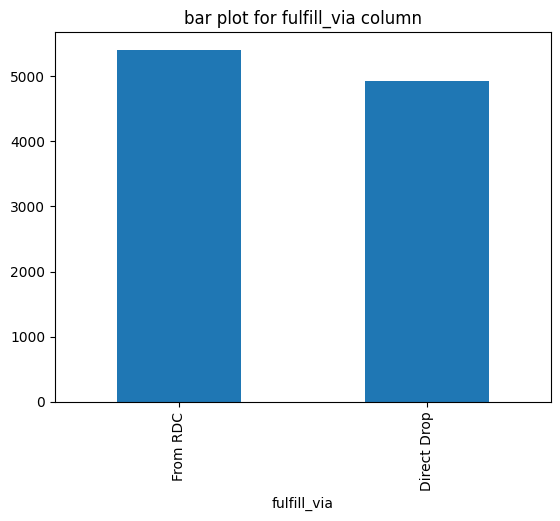

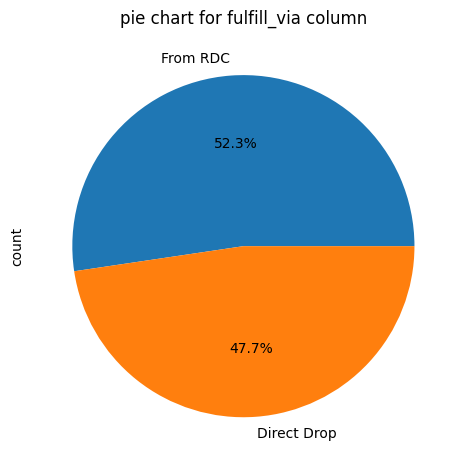

In [201]:
plot('fulfill_via')

### Vendor_inco_term

In [202]:
df['vendor_inco_term'].value_counts()

vendor_inco_term
N/A - From RDC    5404
EXW               2778
DDP               1443
FCA                397
CIP                275
DDU                 15
DAP                  9
CIF                  3
Name: count, dtype: int64

In [203]:
np.round(df["vendor_inco_term"].value_counts(normalize=True),2)

vendor_inco_term
N/A - From RDC    0.52
EXW               0.27
DDP               0.14
FCA               0.04
CIP               0.03
DDU               0.00
DAP               0.00
CIF               0.00
Name: proportion, dtype: float64

### PQ_first_sent_to_client_date

In [204]:
print(df["pq_first_sent_to_client_date"].value_counts().head())
print(df["pq_first_sent_to_client_date"].value_counts().tail())

pq_first_sent_to_client_date
Pre-PQ Process       2476
Date Not Captured     205
9/11/14               205
7/11/13               173
4/30/14               123
Name: count, dtype: int64
pq_first_sent_to_client_date
7/29/10     1
10/3/11     1
12/17/13    1
2/5/15      1
8/29/13     1
Name: count, dtype: int64


In [205]:
df["pq_first_sent_to_client_date"].nunique()

765

In [206]:
df["pq_first_sent_to_client_date"].min()

'1/10/12'

In [207]:
df["pq_first_sent_to_client_date"].max()

'Pre-PQ Process'

In [208]:
df["pq_first_sent_to_client_date"].describe(include=all)

count              10324
unique               765
top       Pre-PQ Process
freq                2476
Name: pq_first_sent_to_client_date, dtype: object

Function called client_dates
- This code is a function called client_dates that takes in a date as a string. The function has three branches. The first branch checks if the input date is equal to the string "Pre-PQ Process", and if so, it returns a specific pre-defined date in the format "%d/%m/%Y" using the pd.to_datetime function from the pandas library.
The second branch checks if the input date is equal to the string "Date Not Captured", and if so, it returns the string "Date Not Captured" without modifying it.
- The third branch is executed if the input date is not equal to either of the previous two strings. This branch checks if the length of the input date string is less than 9 characters, and if so, it converts the date to the format "%m/%d/%y" using the pd.to_datetime function and returns the date.
- If the length of the input date string is not less than 9 characters, it replaces all occurrences of the character "-" with the character "/" in the input date string and then converts the date to the format "%d/%m/%Y" using the pd.to_datetime function and returns the date.

In [209]:
len('10/21/13')

8

In [210]:
def client_dates(date):
    if date=="Pre-PQ Process":
        return pd.to_datetime('01/06/2009',format="%d/%m/%Y")
    elif date=="Date Not Captured":
        return "Date Not Captured"
    else:
        if len(date)<9:
            date=pd.to_datetime(date,format="%m/%d/%y")
            return date
        else:
            date=date.replace("-","/")
            date=pd.to_datetime(date,format="%d/%m/%Y")
            return date

In [211]:
df["pq_first_sent_to_client_date"]=df["pq_first_sent_to_client_date"].apply(client_dates)

In [212]:
df["pq_first_sent_to_client_date"].head(5)

0    2009-06-01 00:00:00
1    2009-06-01 00:00:00
2    2009-06-01 00:00:00
3    2009-06-01 00:00:00
4    2009-06-01 00:00:00
Name: pq_first_sent_to_client_date, dtype: object

In [213]:
print(df["pq_first_sent_to_client_date"].value_counts().head())
print(df["pq_first_sent_to_client_date"].value_counts().tail())

pq_first_sent_to_client_date
2009-06-01 00:00:00    2476
Date Not Captured       205
2014-09-11 00:00:00     205
2013-07-11 00:00:00     173
2014-04-30 00:00:00     123
Name: count, dtype: int64
pq_first_sent_to_client_date
2010-07-29 00:00:00    1
2011-10-03 00:00:00    1
2013-12-17 00:00:00    1
2015-02-05 00:00:00    1
2013-08-29 00:00:00    1
Name: count, dtype: int64


In [214]:
df.drop(df.index[df["pq_first_sent_to_client_date"]=="Date Not Captured"],inplace=True)

In [215]:
print(df["pq_first_sent_to_client_date"].value_counts().head())
print(df["pq_first_sent_to_client_date"].value_counts().tail())

pq_first_sent_to_client_date
2009-06-01    2476
2014-09-11     205
2013-07-11     173
2014-04-30     123
2009-11-06      98
Name: count, dtype: int64
pq_first_sent_to_client_date
2013-07-02    1
2010-09-21    1
2014-08-04    1
2012-11-07    1
2013-08-29    1
Name: count, dtype: int64


### PO_sent_to_vendor_date

In [216]:
print(df["po_sent_to_vendor_date"].value_counts().head())
print(df["po_sent_to_vendor_date"].value_counts().tail())

po_sent_to_vendor_date
N/A - From RDC       5199
Date Not Captured     328
8/27/14                80
3/19/10                78
8/29/14                76
Name: count, dtype: int64
po_sent_to_vendor_date
5/18/15     1
2/10/14     1
10/16/13    1
12/9/11     1
8/29/12     1
Name: count, dtype: int64


In [217]:
df["po_sent_to_vendor_date"].value_counts(normalize=True).head(6)*100

po_sent_to_vendor_date
N/A - From RDC       51.378595
Date Not Captured     3.241427
8/27/14               0.790592
3/19/10               0.770827
8/29/14               0.751062
10/9/14               0.701650
Name: proportion, dtype: float64

- po_sent_to_vendor_date = Date the PO is first sent to the vendor
- Dropping column as it's more than 50% information is captured by from RDC which is categorical and unknown to us.

In [218]:
df.drop('po_sent_to_vendor_date', axis= 1,inplace=True)

### Scheduled_delivery_date

In [219]:
df["scheduled_delivery_date"].value_counts().head()

scheduled_delivery_date
29-Aug-14    97
16-Mar-12    83
27-Aug-14    63
31-May-10    62
31-Jan-14    60
Name: count, dtype: int64

In [220]:
df["scheduled_delivery_date"].value_counts().tail()

scheduled_delivery_date
4-Apr-15     1
5-Jan-15     1
20-Jun-15    1
24-Apr-14    1
9-Sep-15     1
Name: count, dtype: int64

This function transforms a string representation of a date in the format "DD-MMM-YY" (e.g. "16-Jan-22") into a pandas datetime object. The function does this in three steps:

- The first line of the function uses the .replace() method to replace all hyphens (-) in the input string data with forward slashes (/). This is done because the pd.to_datetime() function expects the input string to be in the format "DD/MMM/YY", where "DD" is the day of the month, "MMM" is the three-letter abbreviation for the month, and "YY" is the two-digit year.

- The second line of the function uses the pd.to_datetime() function to convert the modified string into a pandas datetime object. The format parameter is set to "%d/%b/%y", which specifies the format of the input string. The %d directive represents the day of the month (as a zero-padded two-digit number), the %b directive represents the three-letter abbreviation for the month, and the %y directive represents the two-digit year.

- The third and final line of the function returns the resulting pandas datetime object.

In [221]:
def transform_date(data):
    data=data.replace("-","/")
    data=pd.to_datetime(data,format="%d/%b/%y")
    return data

In [ ]:
df["scheduled_delivery_date"]=df["scheduled_delivery_date"].apply(transform_date)
df["scheduled_delivery_date"].value_counts().head()

In [ ]:
df["delivery_recorded_date"]=df["delivery_recorded_date"].apply(transform_date)
df["delivered_to_client_date"].value_counts().head()

delivered_to_client_date
29-Aug-14    74
27-Aug-14    66
28-Jun-10    60
14-Feb-12    60
16-Apr-13    59
Name: count, dtype: int64

### Delivered_to_client_date

In [ ]:
df["delivered_to_client_date"]=df["delivered_to_client_date"].apply(transform_date)
df["delivered_to_client_date"].value_counts().head()

delivered_to_client_date
2014-08-29    74
2014-08-27    66
2010-06-28    60
2012-02-14    60
2013-04-16    59
Name: count, dtype: int64

### Product Group

In [60]:
df["product_group"].value_counts()

product_group
ARV     8345
HRDT    1728
ANTM      22
ACT       16
MRDT       8
Name: count, dtype: int64

In [61]:
np.round(df["product_group"].value_counts(normalize=True)*100,2)

product_group
ARV     82.47
HRDT    17.08
ANTM     0.22
ACT      0.16
MRDT     0.08
Name: proportion, dtype: float64

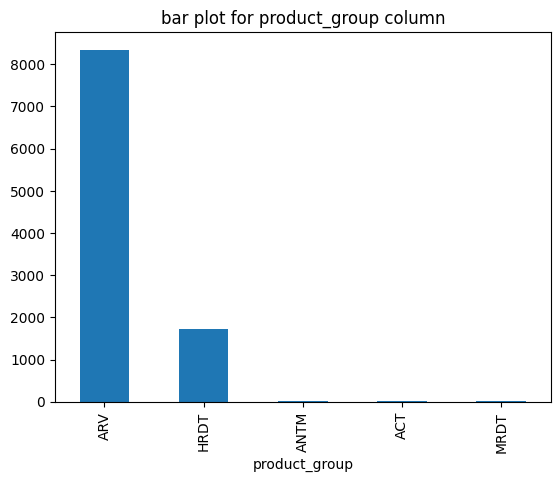

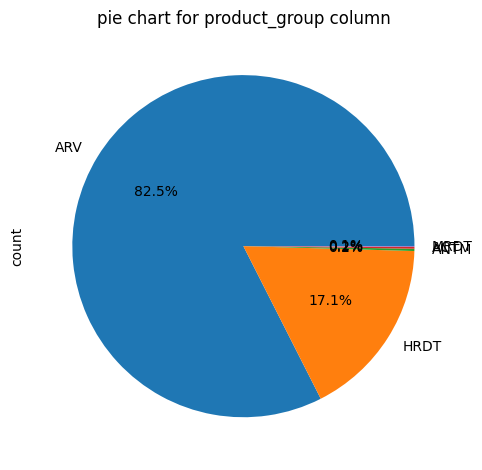

In [ ]:
plot("product_group")

Text(0.5, 1.0, 'bar chart for product group')

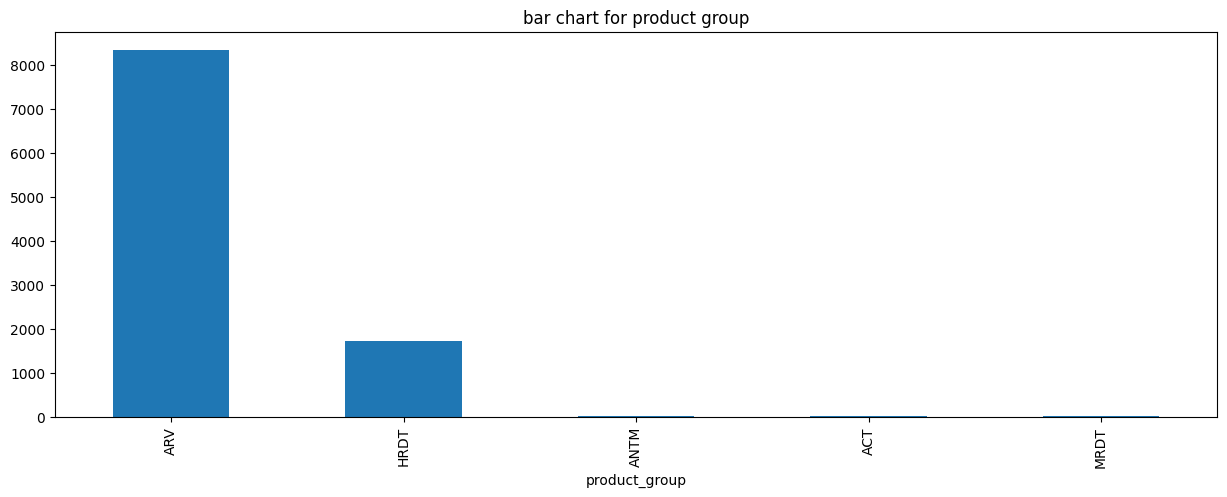

In [ ]:
plt.figure(figsize=(15,5))
df["product_group"].value_counts().plot.bar()
plt.title("bar chart for product group")

In [64]:
other_product=df["product_group"].value_counts().to_dict()
HRDT=[]
for key,val in other_product.items():
    if val<=2000:
        HRDT.append(key) 

In [65]:
df["product_group"]=df["product_group"].replace(HRDT,"other")

In [66]:
df["product_group"].value_counts()

product_group
ARV      8345
other    1774
Name: count, dtype: int64

Text(0.5, 1.0, 'bar chart for product group')

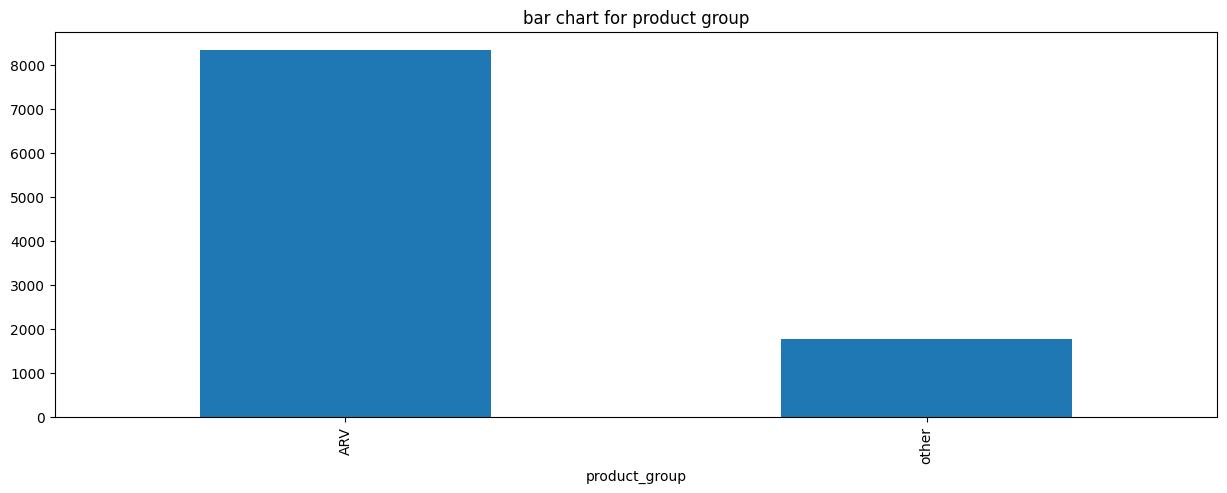

In [ ]:
plt.figure(figsize=(15,5))
df["product_group"].value_counts().plot.bar()
plt.title("bar chart for product group")

### Sub Classification

In [68]:
df["sub_classification"].value_counts()

sub_classification
Adult                   6418
Pediatric               1927
HIV test                1567
HIV test - Ancillary     161
Malaria                   30
ACT                       16
Name: count, dtype: int64

Text(0.5, 1.0, 'bar chart for Sub Classification')

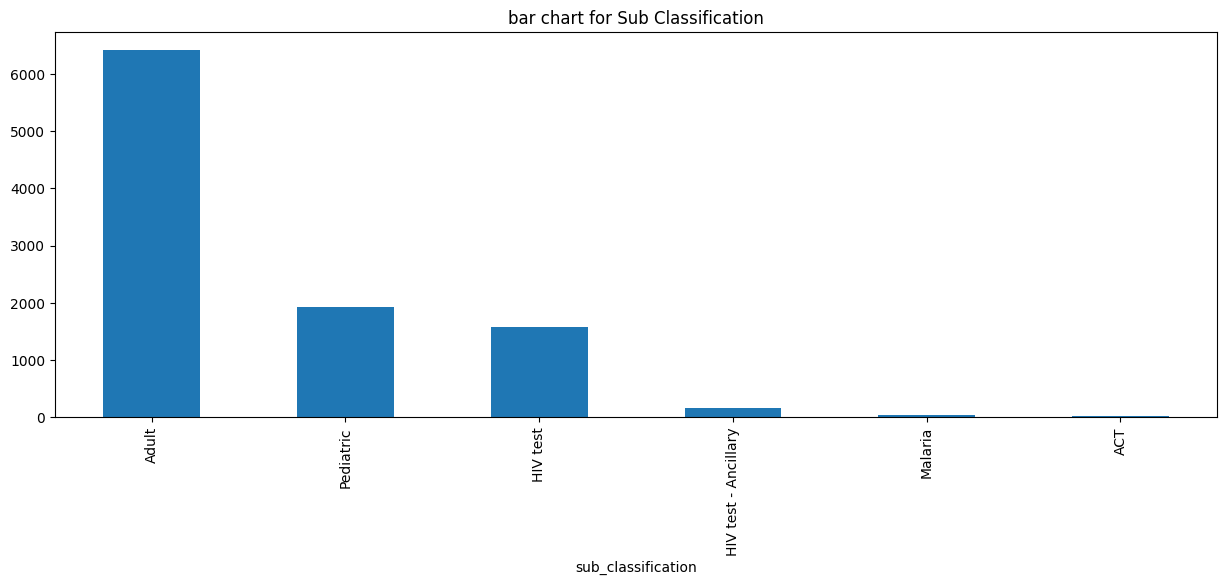

In [ ]:
plt.figure(figsize=(15,5))
df["sub_classification"].value_counts().plot.bar()
plt.title("bar chart for Sub Classification")

In [70]:
other_class=df["sub_classification"].value_counts().to_dict()
HIV_plus=[]
for key,val in other_class.items():
    if val<=1600:
        HIV_plus.append(key) 

In [71]:
df["sub_classification"]=df["sub_classification"].replace(HIV_plus,"HIV+")

In [72]:
df["sub_classification"].value_counts()

sub_classification
Adult        6418
Pediatric    1927
HIV+         1774
Name: count, dtype: int64

Text(0.5, 1.0, 'bar chart for Sub Classification')

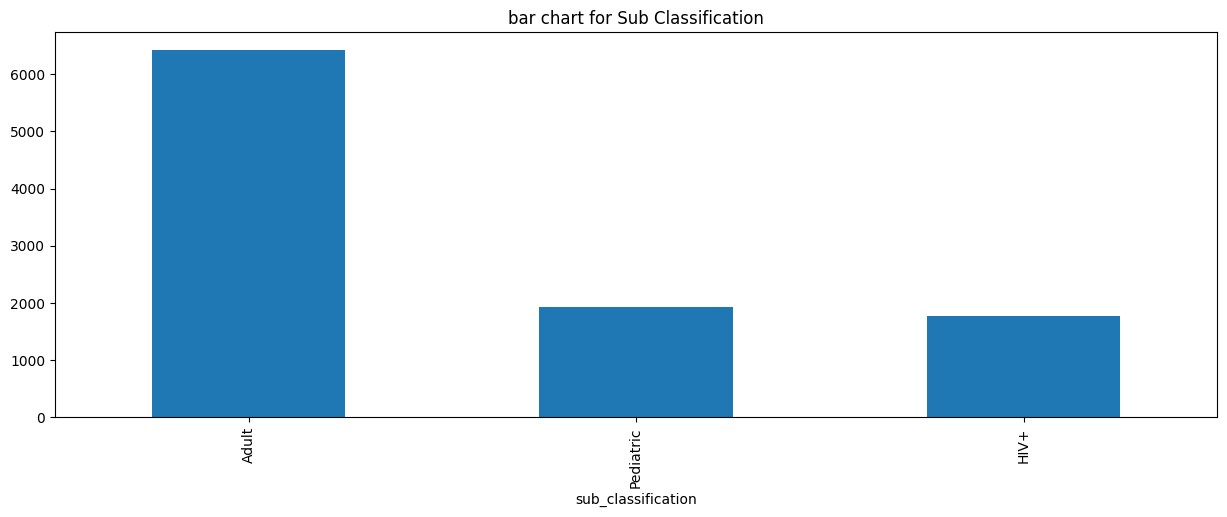

In [ ]:
plt.figure(figsize=(15,5))
df["sub_classification"].value_counts().plot.bar()
plt.title("bar chart for Sub Classification")

### Vendor

In [74]:
df["vendor"].value_counts().head()

vendor
SCMS from RDC               5199
Orgenics, Ltd                754
S. BUYS WHOLESALER           715
Aurobindo Pharma Limited     668
Trinity Biotech, Plc         356
Name: count, dtype: int64

In [75]:
df["vendor"].value_counts().tail()

vendor
BIO-RAD LABORATORIES PTY LTD. (SOUTH AFRICA)    1
OMEGA DIAGNOSTICS LTD                           1
PLURIPHARM S.A.                                 1
CENTRAL PHARMACEUTICAL COMPANY NO. 1            1
AUROBINDO PHARAM (SOUTH AFRICA)                 1
Name: count, dtype: int64

In [76]:
df["vendor"].value_counts(normalize=True).head()

vendor
SCMS from RDC               0.513786
Orgenics, Ltd               0.074513
S. BUYS WHOLESALER          0.070659
Aurobindo Pharma Limited    0.066014
Trinity Biotech, Plc        0.035181
Name: proportion, dtype: float64

In [77]:
other_vendor=df["vendor"].value_counts().to_dict()
other_catv=[]
for key,val in other_vendor.items():
    if val<=5000:
        other_catv.append(key) 

In [78]:
df["vendor"]=df["vendor"].replace(other_catv,"other")

Text(0.5, 1.0, 'bar chart for vendor column')

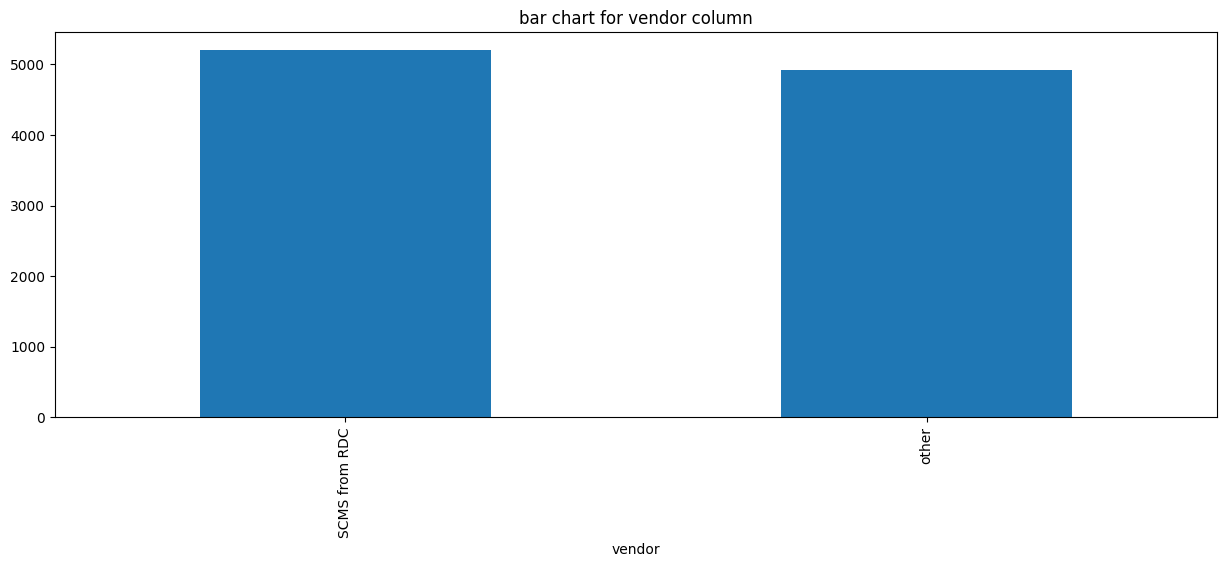

In [ ]:
plt.figure(figsize=(15,5))
df["vendor"].value_counts().plot.bar()
plt.title("bar chart for vendor column")

In [80]:
df["vendor"].value_counts(normalize=True)

vendor
SCMS from RDC    0.513786
other            0.486214
Name: proportion, dtype: float64

### Item_description

In [81]:
df["item_description"].value_counts().head()

item_description
Efavirenz 600mg, tablets, 30 Tabs                                   733
Nevirapine 200mg, tablets, 60 Tabs                                  605
Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs                   580
HIV 1/2, Determine Complete HIV Kit, 100 Tests                      577
Lamivudine/Nevirapine/Zidovudine 150/200/300mg, tablets, 60 Tabs    554
Name: count, dtype: int64

In [82]:
df["item_description"].value_counts().tail()

item_description
Lamivudine/Zidovudine+Abacavir 150/300+300mg, tablets, co-blister, 60+60 Tabs    1
HIV, Pepti-LAV 1|2 (HIV-1|2 Ab differenciation, Immuno-Blot)                     1
Malaria Antigen P.f Kit, 30 x 1 Test                                             1
Lopinavir/Ritonavir 80/20mg/ml [Kaletra], oral solution, cool, Bottle, 160 ml    1
Lopinavir/Ritonavir 200/50mg, [DON] tablets, 120 Tabs                            1
Name: count, dtype: int64

In [83]:
df.drop("item_description",axis=1,inplace=True)

### Molecule/test_type

In [84]:
df["molecule/test_type"].value_counts().head()

molecule/test_type
Efavirenz                           1099
Nevirapine                           854
Lamivudine/Nevirapine/Zidovudine     681
Lamivudine/Zidovudine                672
Lopinavir/Ritonavir                  629
Name: count, dtype: int64

In [85]:
df["molecule/test_type"].value_counts().tail()

molecule/test_type
Mefloquine (as hydrochloride)       1
Quinine (as sulfate)                1
Primaquine base (as diphosphate)    1
Lamivudine/Zidovudine+Abacavir      1
Nelfinavir                          1
Name: count, dtype: int64

In [86]:
# Here, column Molecule/Test Type gives information on test type and consisting molecules present in it. Hence dropping it.
df.drop("molecule/test_type",axis=1,inplace=True)

### Brand

In [87]:
df["brand"].value_counts()

brand
Generic            7098
Determine           799
Uni-Gold            373
Aluvia              250
Kaletra             161
Norvir              136
Stat-Pak            115
Bioline             113
Videx                84
Truvada              83
Colloidal Gold       70
Stocrin/Sustiva      69
OraQuick             60
Viread               51
Invirase             51
Zerit                46
Isentress            44
Epivir               42
Prezista             42
Videx EC             41
Retrovir             41
Ziagen               37
Crixivan             36
Capillus             35
Intelence            32
Genie                30
Viramune             28
Clearview            19
Trizivir             18
Reyataz              18
Atripla              16
First Response       15
Coartem              12
Viracept             11
DoubleCheck           5
INSTi                 5
Multispot             5
Paramax               5
LAV                   4
Combivir              3
Reveal                3
ImmunoComb

In [88]:
other_brand=df["brand"].value_counts().to_dict()
other_catb=[]
for key,val in other_brand.items():
    if val<=1000:
        other_catb.append(key)  

In [89]:
df["brand"]=df["brand"].replace(other_catb,"other")

In [90]:
def barplot(cols):
    plt.figure(figsize=(25,10))
    df[cols].value_counts().plot.bar()
    plt.title("barplot for {}".format(cols))
    plt.show()

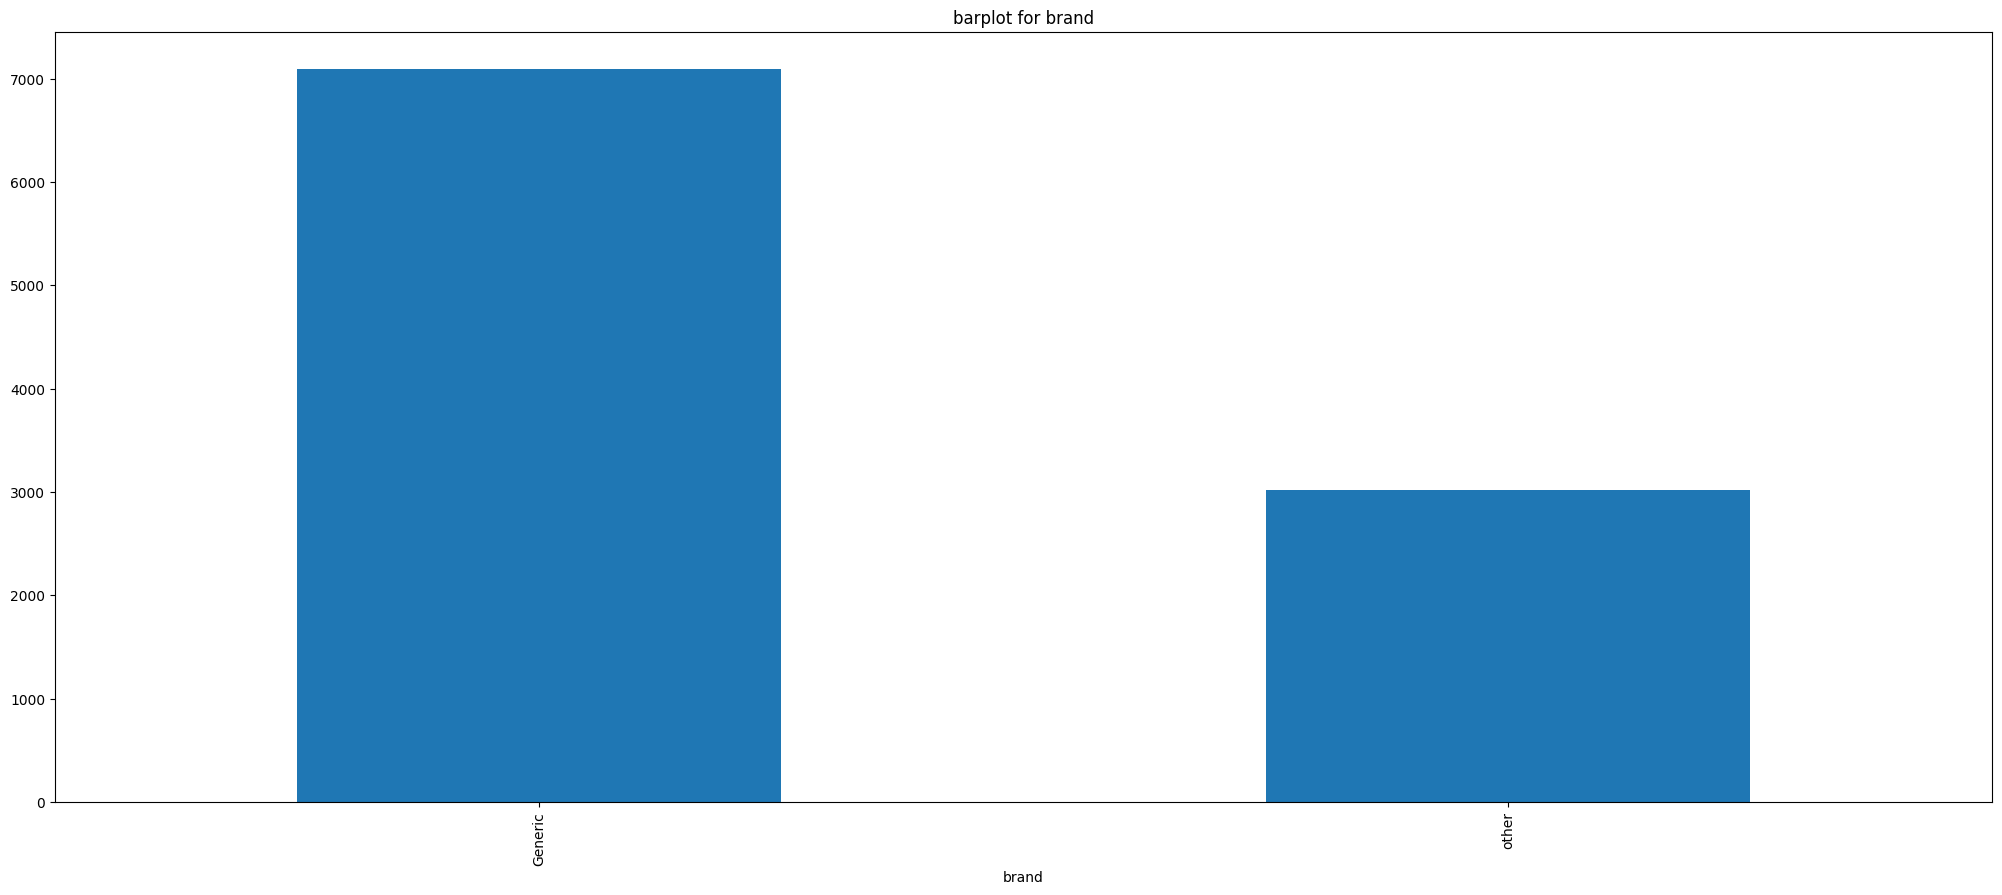

In [ ]:
barplot("brand")

### Dosage_form

In [ ]:
df["dosage_form"].value_counts()

dosage_form
Tablet                                3462
Tablet - FDC                          2659
Test kit                              1575
Oral solution                          712
Capsule                                706
Chewable/dispersible tablet - FDC      239
Oral suspension                        209
Test kit - Ancillary                   161
Chewable/dispersible tablet            144
Delayed-release capsules               131
Delayed-release capsules - blister      41
Powder for oral solution                28
Tablet - FDC + co-blister               20
Tablet - FDC + blister                  15
Tablet - blister                        10
Injection                                6
Oral powder                              1
Name: count, dtype: int64

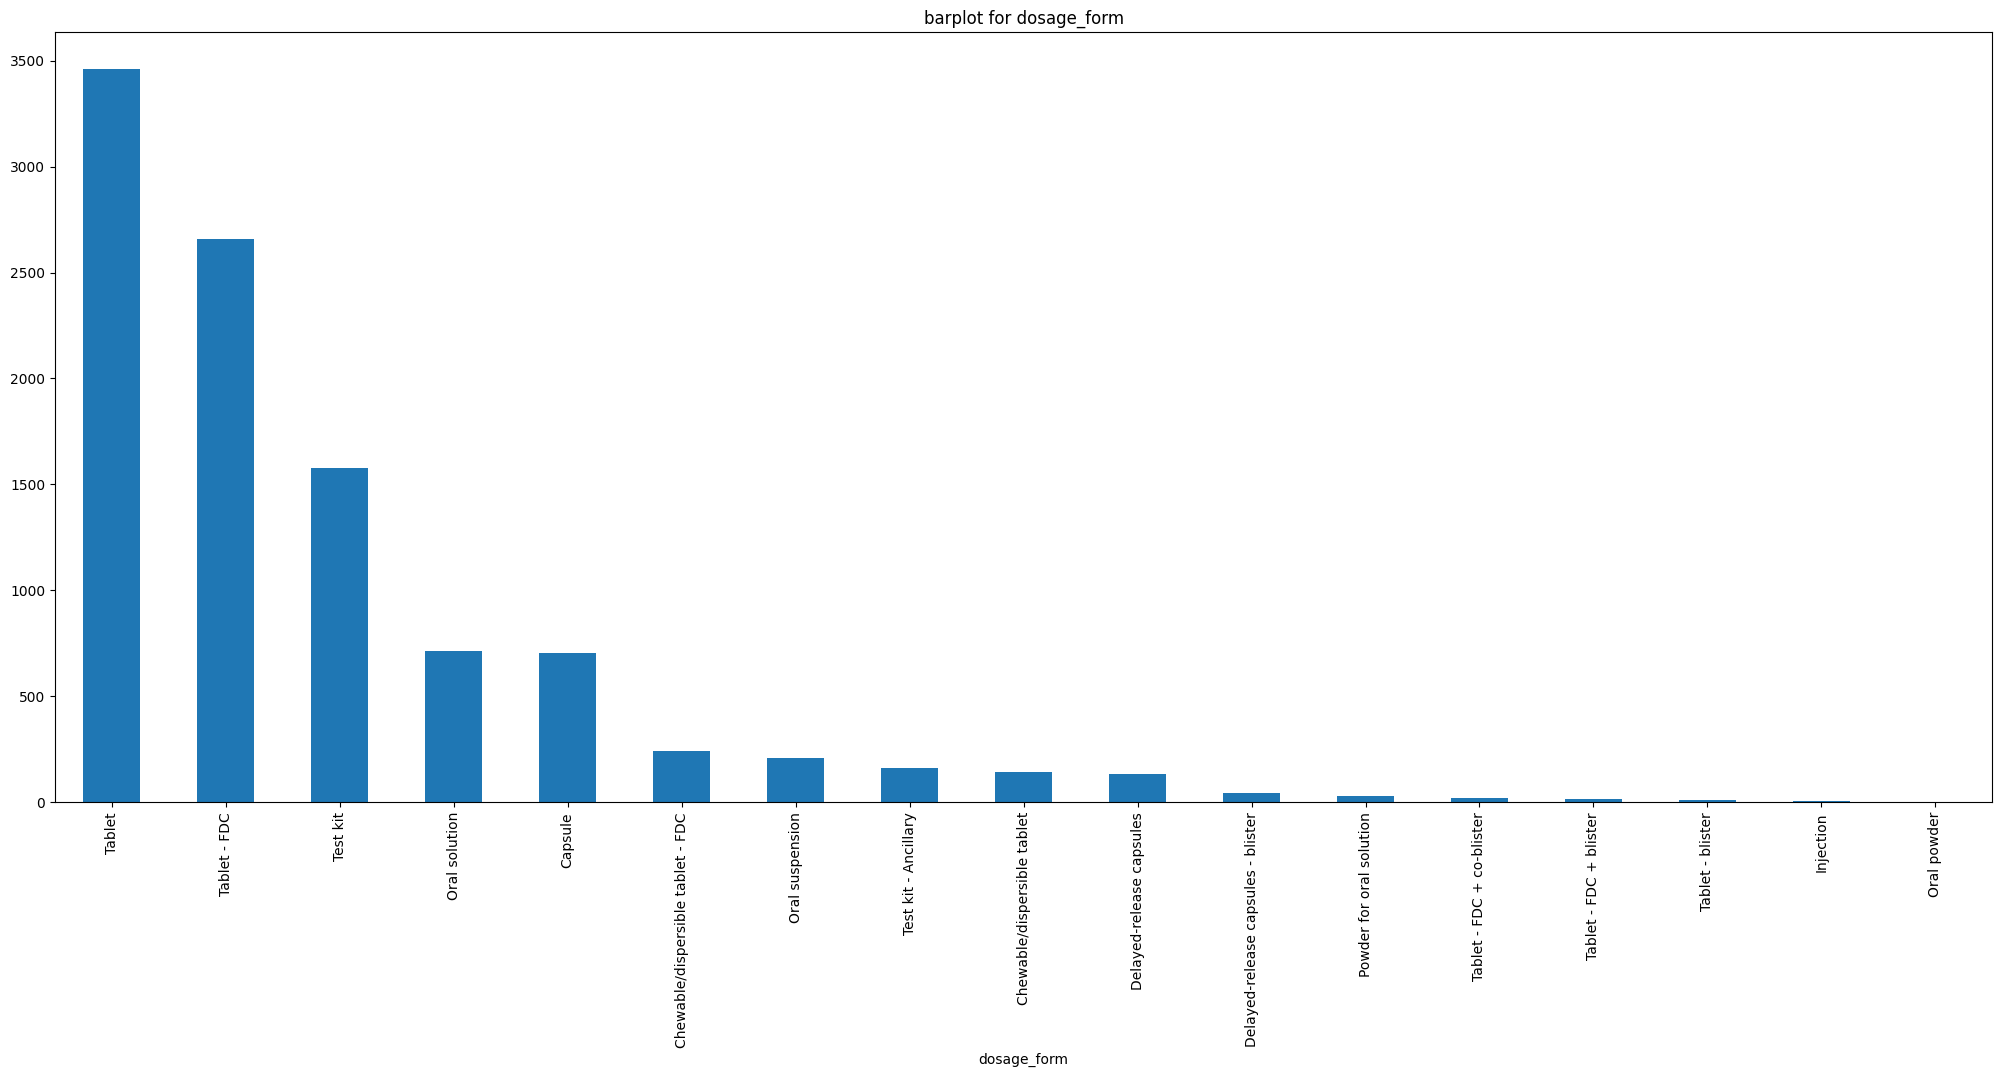

In [ ]:
barplot("dosage_form")

In [94]:
#dropping dosage_form as it is dependent on other feature named dosage 
df.drop("dosage_form",axis=1,inplace=True)

### Unit_of_measure_(per_pack)

In [95]:
df["unit_of_measure_(per_pack)"].value_counts()

unit_of_measure_(per_pack)
60      3993
30      2580
100      974
240      655
120      474
20       470
90       219
300      153
1        126
25       114
180       76
200       75
270       51
336       39
40        25
84        22
1000      16
50        12
3          8
540        7
720        5
2          4
5          4
18         4
36         3
168        3
24         2
12         2
160        1
48         1
144        1
Name: count, dtype: int64

### line_item_quantity

In [ ]:
df["line_item_quantity"].value_counts()

line_item_quantity
10000    93
1000     91
100      85
2000     73
5000     69
         ..
2064      1
38113     1
32070     1
9935      1
36639     1
Name: count, Length: 4962, dtype: int64

### Manufacturing_site

In [ ]:
df["manufacturing_site"].value_counts()

manufacturing_site
Aurobindo Unit III, India              3056
Mylan (formerly Matrix) Nashik         1383
Hetero Unit III Hyderabad IN            858
Cipla, Goa, India                       652
Strides, Bangalore, India.              530
                                       ... 
BUNDI INTERNATIONAL DIAGNOSTICS LTD       1
Remedica, Limassol, Cyprus                1
OMEGA Diagnostics, UK                     1
ABBSP                                     1
Medochemie Factory A, CY                  1
Name: count, Length: 88, dtype: int64

manufacturing_site
Aurobindo Unit III, India         3056
Mylan (formerly Matrix) Nashik    1383
Hetero Unit III Hyderabad IN       858
Cipla, Goa, India                  652
Strides, Bangalore, India.         530
Alere Medical Co., Ltd.            481
Trinity Biotech, Plc               405
ABBVIE Ludwigshafen Germany        366
Inverness Japan                    345
ABBVIE (Abbott) Logis. UK          215
dtype: int64


Text(0.5, 0, 'Manufacturing Site Name')

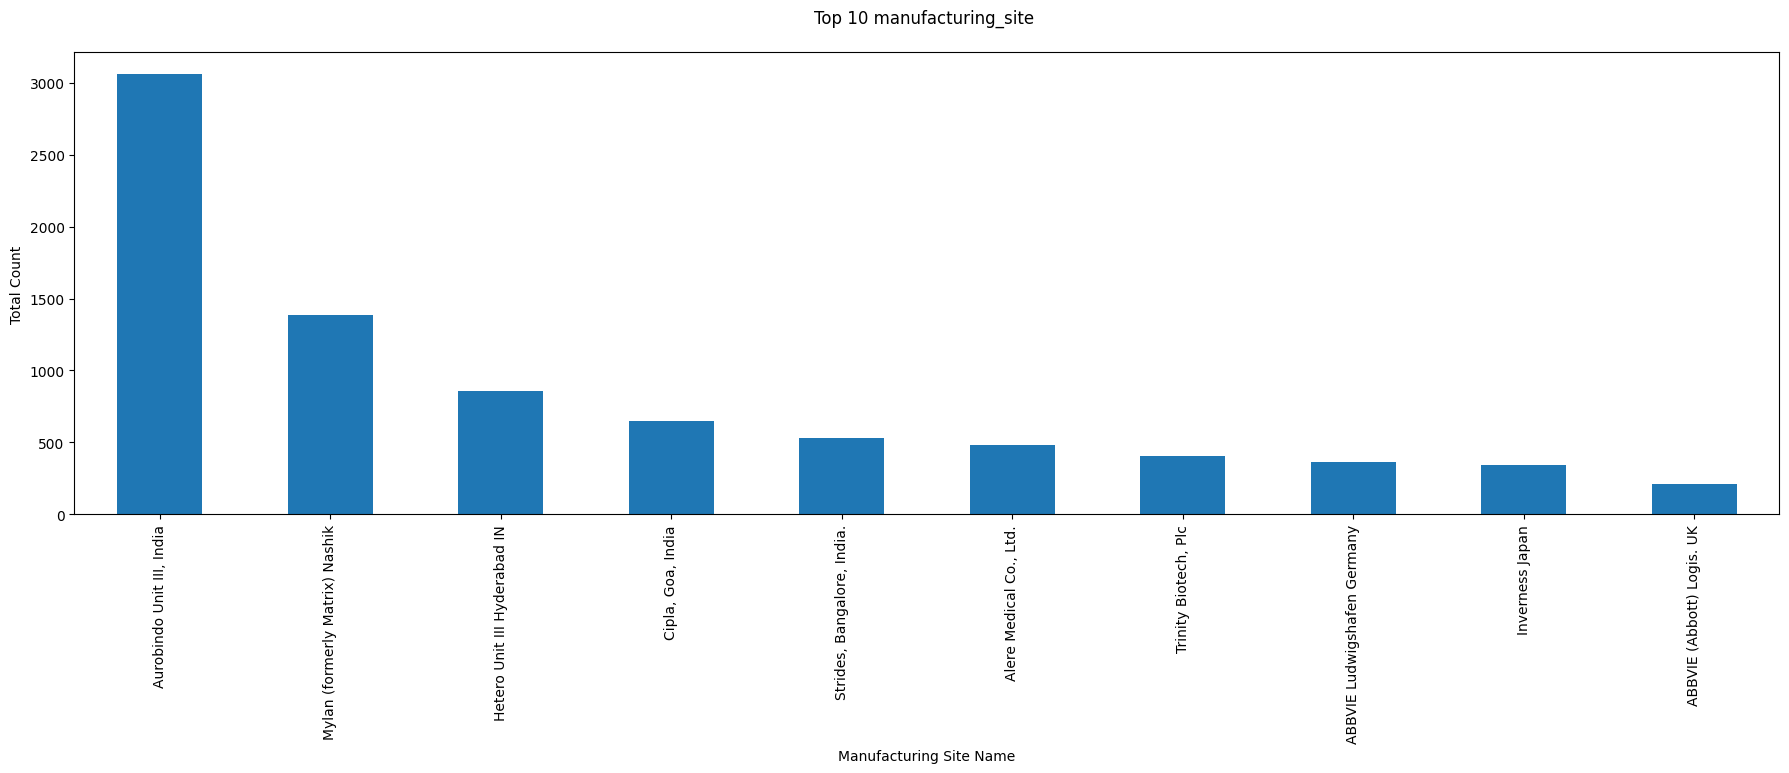

In [ ]:
plt.figure(figsize=(22,6))
TopManufacturingSite=df.groupby('manufacturing_site').size().nlargest(10)
print(TopManufacturingSite)
TopManufacturingSite.plot(kind='bar')
plt.title('Top 10 manufacturing_site \n')
plt.ylabel('Total Count')
plt.xlabel('Manufacturing Site Name')

In [99]:
other_manufacture=df["manufacturing_site"].value_counts().to_dict()
other_cat=[]
for key,val in other_manufacture.items():
    if val<=500:
        other_cat.append(key) 

In [100]:
df["manufacturing_site"]=df["manufacturing_site"].replace(other_cat,"other")

<Axes: xlabel='manufacturing_site'>

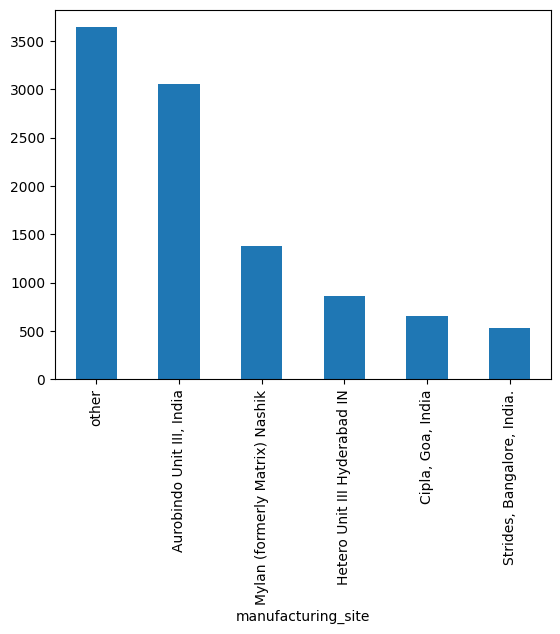

In [ ]:
df["manufacturing_site"].value_counts().plot.bar()

### First_line_designation

In [102]:
df["first_line_designation"].value_counts()

first_line_designation
Yes    6876
No     3243
Name: count, dtype: int64

In [103]:
np.round(df["first_line_designation"].value_counts(normalize=True)*100,2)

first_line_designation
Yes    67.95
No     32.05
Name: proportion, dtype: float64

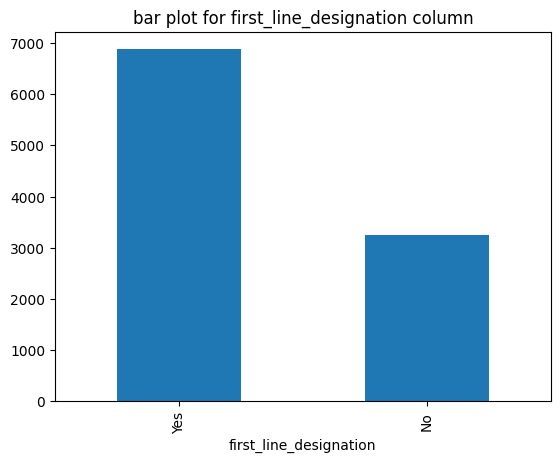

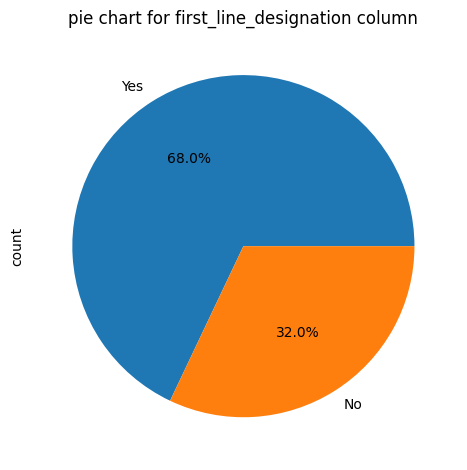

In [ ]:
plot("first_line_designation")

### Weight_(kilograms)

In [ ]:
df["weight_(kilograms)"].value_counts()

weight_(kilograms)
Weight Captured Separately    1499
2                               29
6                               26
1                               21
5                               20
                              ... 
See DN-667 (ID#:10967)           1
2018                             1
7349                             1
5009                             1
1392                             1
Name: count, Length: 4602, dtype: int64

In [106]:
df.drop("weight_(kilograms)",axis=1,inplace=True)

### freight_cost_(usd)

In [ ]:
df["freight_cost_(usd)"].value_counts()

freight_cost_(usd)
Freight Included in Commodity Cost    1440
Invoiced Separately                    231
9736.1                                  36
6147.18                                 27
See DN-304 (ID#:10589)                  16
                                      ... 
1025.37                                  1
35569.75                                 1
4139.95                                  1
8256.97                                  1
See DN-4282 (ID#:83919)                  1
Name: count, Length: 6610, dtype: int64

In [108]:
def trans_freight_cost(x):
    if x.find("See")!=-1:
        return np.nan
    elif x=="Freight Included in Commodity Cost" or x=="Invoiced Separately":
        return 0
    else:
        return x

In [109]:
df["freight_cost_(usd)"]=df["freight_cost_(usd)"].apply(trans_freight_cost)

In [110]:
df["freight_cost_(usd)"].value_counts()

freight_cost_(usd)
0           1671
9736.1        36
6147.18       27
13398.06      16
7329.83       12
            ... 
18423.91       1
21555.16       1
21683.23       1
26084.14       1
3410           1
Name: count, Length: 5343, dtype: int64

In [ ]:
df.isna().sum()

po_/_so_#                          0
asn/dn_#                           0
country                            0
fulfill_via                        0
vendor_inco_term                   0
shipment_mode                      0
pq_first_sent_to_client_date       0
scheduled_delivery_date            0
delivered_to_client_date           0
delivery_recorded_date             0
product_group                      0
sub_classification                 0
vendor                             0
brand                              0
unit_of_measure_(per_pack)         0
line_item_quantity                 0
line_item_value                    0
pack_price                         0
unit_price                         0
manufacturing_site                 0
first_line_designation             0
freight_cost_(usd)              2394
line_item_insurance_(usd)          0
dtype: int64

In [112]:
df["freight_cost_(usd)"]=df["freight_cost_(usd)"].replace(np.nan,df["freight_cost_(usd)"].median())
df["freight_cost_(usd)"].head()

0      780.34
1      4521.5
2     1653.78
3    16007.06
4    45450.08
Name: freight_cost_(usd), dtype: object

In [113]:
df["freight_cost_(usd)"]=df["freight_cost_(usd)"].astype("float")

Description of freight_cost_(usd)
----------------------------------------------------------------------
count     10119.000000
mean       7536.104702
std       13156.759791
min           0.000000
25%        1211.490000
50%        3526.690000
75%        7783.400000
max      289653.200000
Name: freight_cost_(usd), dtype: float64

 Histogram and Boxplot of freight_cost_(usd)
----------------------------------------------------------------------
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


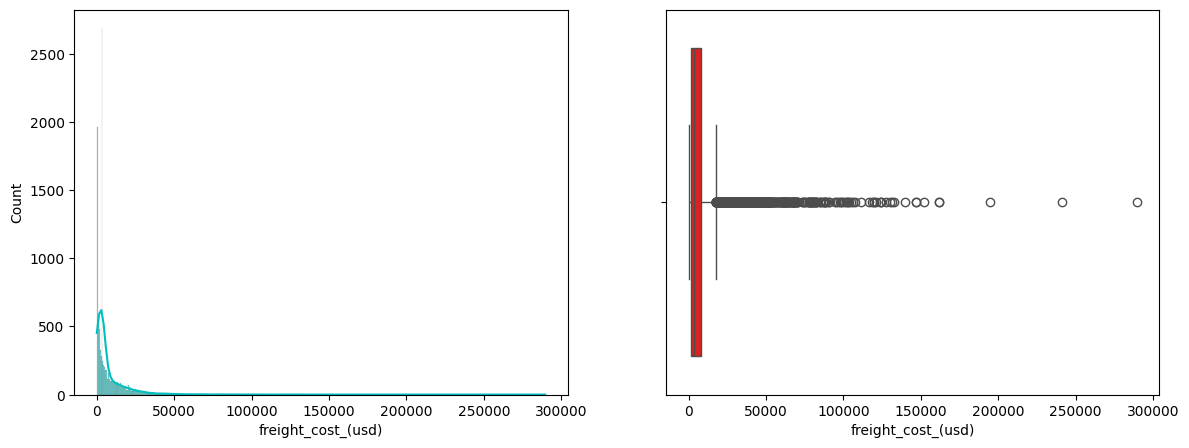

In [ ]:
analysis('freight_cost_(usd)')

In [115]:
df['shipment_mode']

0          Air
1          Air
2          Air
3          Air
4          Air
         ...  
10319    Truck
10320    Truck
10321    Truck
10322    Truck
10323    Truck
Name: shipment_mode, Length: 10119, dtype: object

shipment_mode
Air            6367
Truck          2764
Air Charter     618
Ocean           370
Name: count, dtype: int64


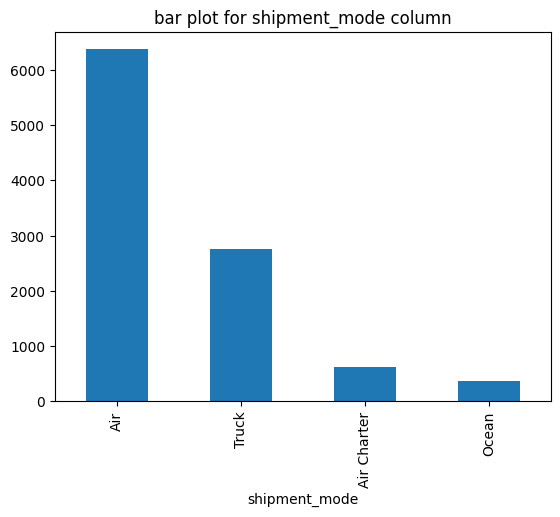

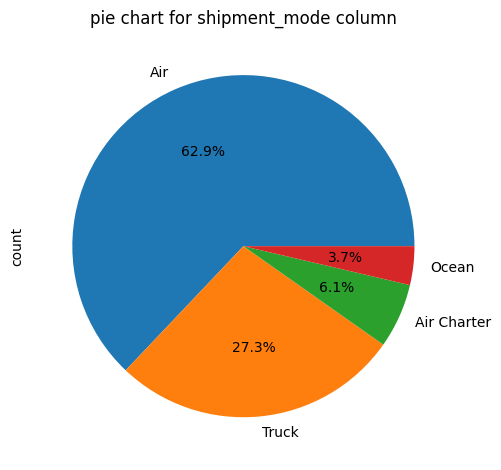

In [ ]:
print(df["shipment_mode"].value_counts())

plot("shipment_mode")

### line_item_insurance_(usd)

In [ ]:
df["line_item_insurance_(usd)"].value_counts()

line_item_insurance_(usd)
47.04     289
0.00       44
0.02       34
0.07       32
0.05       30
         ... 
33.42       1
52.92       1
301.53      1
89.82       1
85.82       1
Name: count, Length: 6607, dtype: int64

In [118]:
df["line_item_insurance_(usd)"].describe()

count    10119.000000
mean       232.400635
std        487.856951
min          0.000000
25%          6.975000
50%         47.040000
75%        239.160000
max       7005.490000
Name: line_item_insurance_(usd), dtype: float64

Description of line_item_insurance_(usd)
----------------------------------------------------------------------
count    10119.000000
mean       232.400635
std        487.856951
min          0.000000
25%          6.975000
50%         47.040000
75%        239.160000
max       7005.490000
Name: line_item_insurance_(usd), dtype: float64

 Histogram and Boxplot of line_item_insurance_(usd)
----------------------------------------------------------------------
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


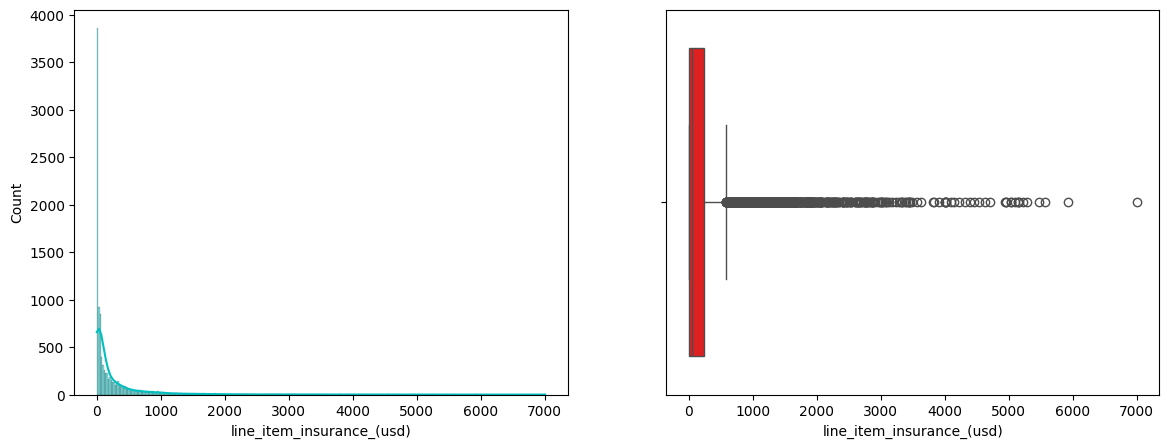

In [ ]:
analysis("line_item_insurance_(usd)")

In [120]:
df['delivery_recorded_date']=pd.to_datetime(df['delivery_recorded_date'])
df['pq_first_sent_to_client_date']=pd.to_datetime(df['pq_first_sent_to_client_date'])

In [ ]:
#calculating total no of days to process the delivery
df["days_to_process"]=df["delivery_recorded_date"]-df["pq_first_sent_to_client_date"]
df["days_to_process"].head(5)

0   -1095 days
1    -930 days
2   -1009 days
3   -1004 days
4   -1025 days
Name: days_to_process, dtype: timedelta64[ns]

In [122]:
df['days_to_process'] = df['days_to_process'].dt.days.astype('int64')

Description of days_to_process
----------------------------------------------------------------------
count    10119.00000
mean        39.46052
std        277.96314
min      -1126.00000
25%         27.00000
50%        125.00000
75%        194.00000
max        724.00000
Name: days_to_process, dtype: float64

 Histogram and Boxplot of days_to_process
----------------------------------------------------------------------
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


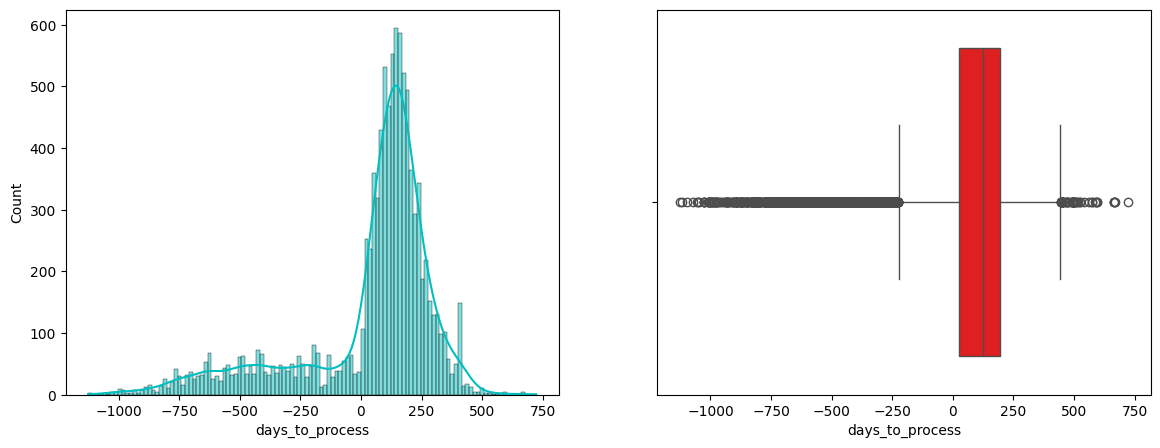

In [ ]:
analysis('days_to_process')

In [124]:
df.drop(["delivery_recorded_date","pq_first_sent_to_client_date","scheduled_delivery_date","delivered_to_client_date"],axis=1,inplace=True)

In [ ]:
df.head()

,po_/_so_#,asn/dn_#,country,fulfill_via,vendor_inco_term,shipment_mode,product_group,sub_classification,vendor,brand,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,freight_cost_(usd),line_item_insurance_(usd),days_to_process
0,SCMS,ASN,Côte d'Ivoire,Direct Drop,EXW,Air,other,HIV+,other,other,30,19,551.0,29.00,0.97,other,Yes,780.34,47.04,-1095
1,SCMS,ASN,Vietnam,Direct Drop,EXW,Air,ARV,Pediatric,other,Generic,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,4521.50,47.04,-930
2,SCMS,ASN,Côte d'Ivoire,Direct Drop,FCA,Air,other,HIV+,other,other,100,500,40000.0,80.00,0.80,other,Yes,1653.78,47.04,-1009
3,SCMS,ASN,Vietnam,Direct Drop,EXW,Air,ARV,Adult,other,Generic,60,31920,127360.8,3.99,0.07,other,Yes,16007.06,47.04,-1004
4,SCMS,ASN,Vietnam,Direct Drop,EXW,Air,ARV,Adult,other,Generic,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,45450.08,47.04,-1025


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10119 entries, 0 to 10323
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   po_/_so_#                   10119 non-null  object 
 1   asn/dn_#                    10119 non-null  object 
 2   country                     10119 non-null  object 
 3   fulfill_via                 10119 non-null  object 
 4   vendor_inco_term            10119 non-null  object 
 5   shipment_mode               10119 non-null  object 
 6   product_group               10119 non-null  object 
 7   sub_classification          10119 non-null  object 
 8   vendor                      10119 non-null  object 
 9   brand                       10119 non-null  object 
 10  unit_of_measure_(per_pack)  10119 non-null  int64  
 11  line_item_quantity          10119 non-null  int64  
 12  line_item_value             10119 non-null  float64
 13  pack_price                  10119 no

### Outlier treatment

[]

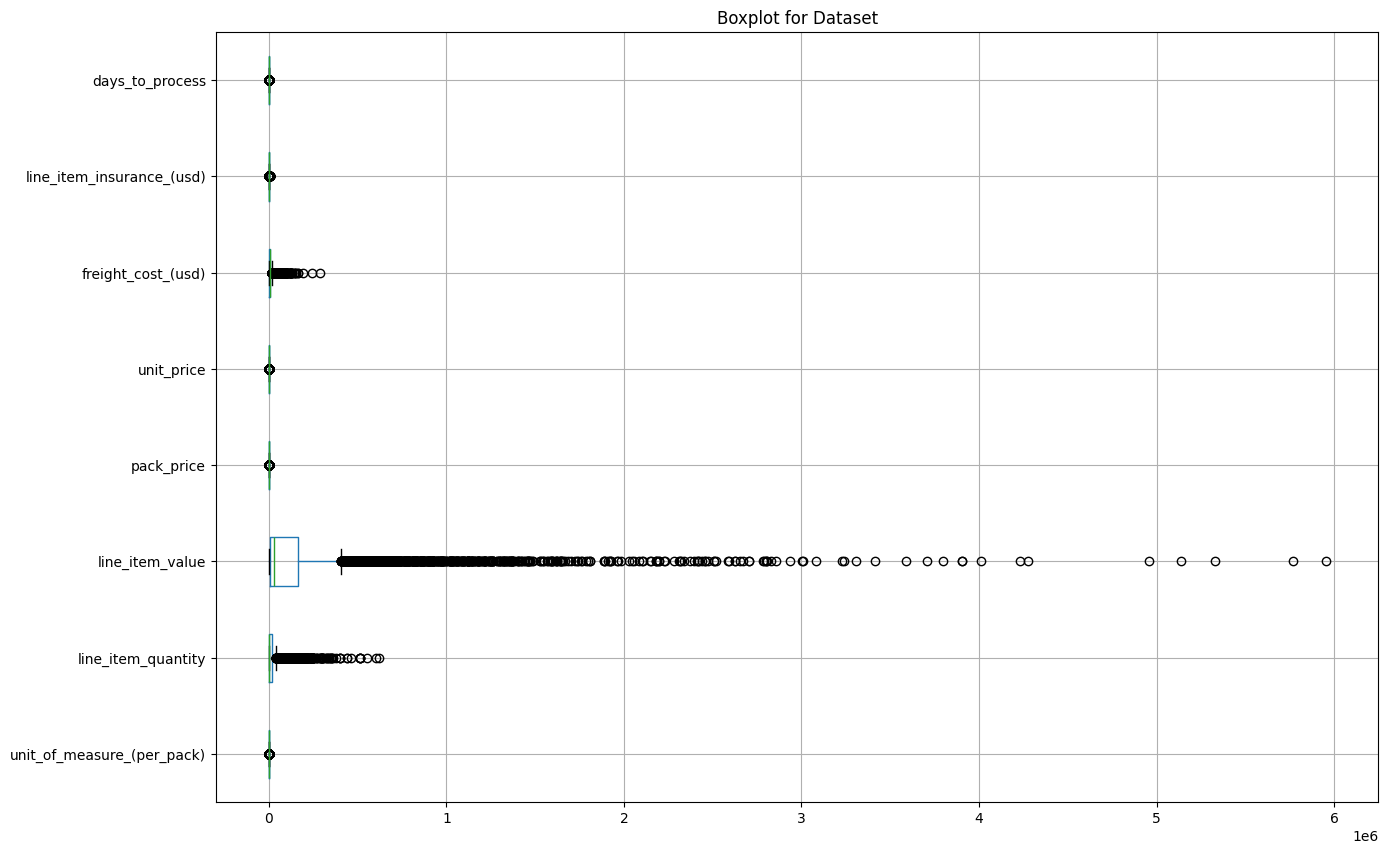

In [ ]:
plt.figure(figsize=(15,10))
df.boxplot(vert=0)
plt.title("Boxplot for Dataset")
plt.plot()

In [128]:
numeric_col = df.select_dtypes(['int64','float64'])

In [129]:
def detect_outliers(data, cols):
    outliers = {}
    for col in cols:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lr = q1 - 1.5 * iqr
        ur = q3 + 1.5 * iqr
        lr_percent = np.round(len(df[df[col]<lr])*100/len(df[col]),decimals=2)
        ur_percent = np.round(len(df[df[col]>ur])*100/len(df[col]),decimals=2)
        outliers[col] = {'lower_bound': lr, 'upper_bound': ur,'lr_percent':lr_percent, 'ur_percent': ur_percent ,'percentage': round(((data[(data[col] < lr) | (data[col] > ur)].shape[0]) / data.shape[0]) * 100, 2)}
    return outliers

In [ ]:
detect_outliers(df, numeric_col)

{'unit_of_measure_(per_pack)': {'lower_bound': -67.5,
  'upper_bound': 192.5,
  'lr_percent': 0.0,
  'ur_percent': 9.89,
  'percentage': 9.89},
 'line_item_quantity': {'lower_bound': -24500.0,
  'upper_bound': 41900.0,
  'lr_percent': 0.0,
  'ur_percent': 13.32,
  'percentage': 13.32},
 'line_item_value': {'lower_bound': -237467.26749999996,
  'upper_bound': 407202.3125,
  'lr_percent': 0.0,
  'ur_percent': 10.95,
  'percentage': 10.95},
 'pack_price': {'lower_bound': -25.625,
  'upper_bound': 53.775000000000006,
  'lr_percent': 0.0,
  'ur_percent': 11.36,
  'percentage': 11.36},
 'unit_price': {'lower_bound': -0.5275,
  'upper_bound': 1.0924999999999998,
  'lr_percent': 0.0,
  'ur_percent': 8.65,
  'percentage': 8.65},
 'freight_cost_(usd)': {'lower_bound': -8646.375,
  'upper_bound': 17641.265,
  'lr_percent': 0.0,
  'ur_percent': 11.72,
  'percentage': 11.72},
 'line_item_insurance_(usd)': {'lower_bound': -341.3025,
  'upper_bound': 587.4375,
  'lr_percent': 0.0,
  'ur_percent': 11.

In [131]:
def outlier_treatment(data, cols):
    """
    This function will treat the outliers present in the dataset.
    """
    # Calculate the Q1 and Q3 for each column
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        # Calculate the lower bound and upper bound
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Treat the outliers
        data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
        data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    return data


In [132]:
df = outlier_treatment(df, numeric_col)

[]

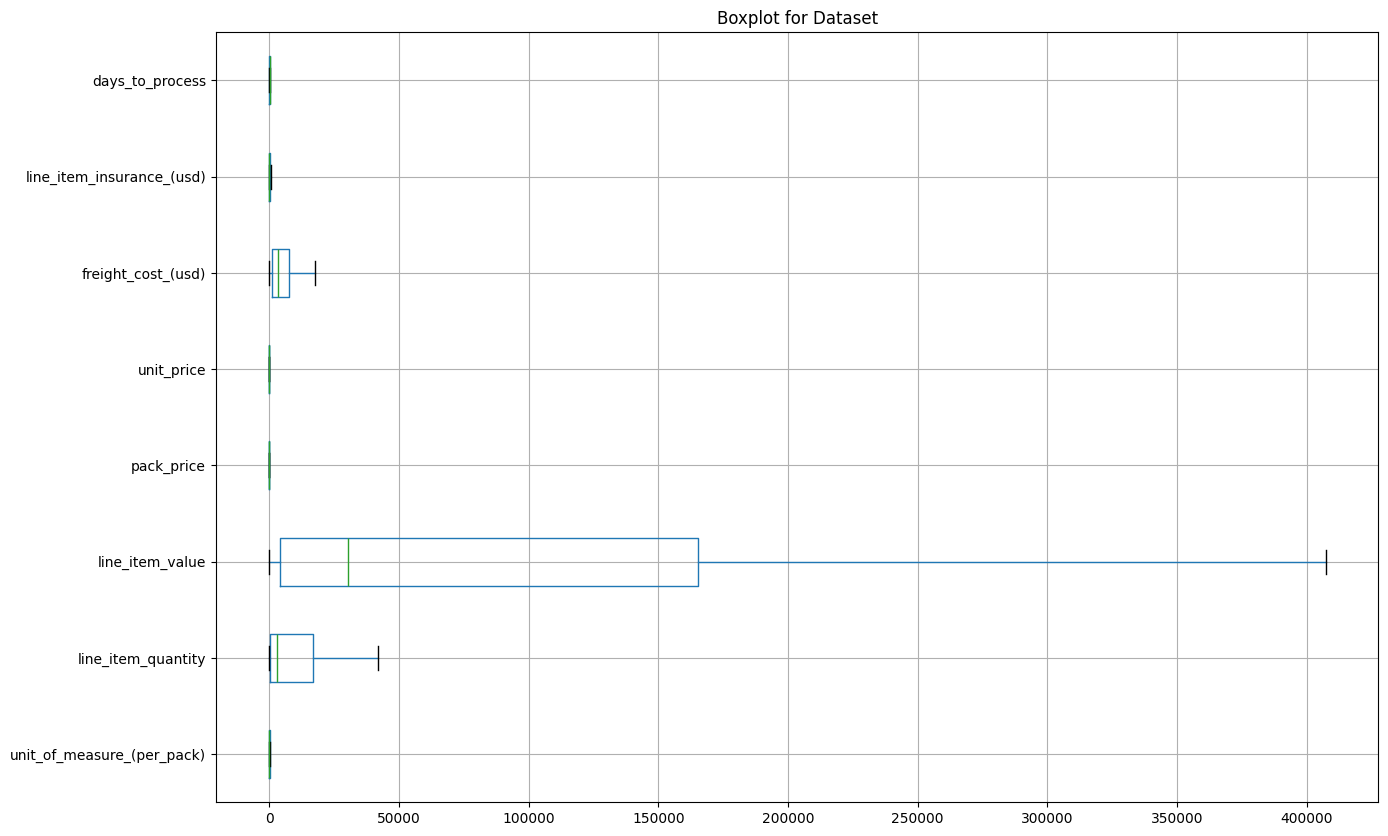

In [ ]:
plt.figure(figsize=(15,10))
df.boxplot(vert=0)
plt.title("Boxplot for Dataset")
plt.plot()

In [ ]:
df

,po_/_so_#,asn/dn_#,country,fulfill_via,vendor_inco_term,shipment_mode,product_group,sub_classification,vendor,brand,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,freight_cost_(usd),line_item_insurance_(usd),days_to_process
0,SCMS,ASN,Côte d'Ivoire,Direct Drop,EXW,Air,other,HIV+,other,other,30.0,19.0,551.0000,29.000,0.97,other,Yes,780.340,47.0400,-223.5
1,SCMS,ASN,Vietnam,Direct Drop,EXW,Air,ARV,Pediatric,other,Generic,192.5,1000.0,6200.0000,6.200,0.03,"Aurobindo Unit III, India",Yes,4521.500,47.0400,-223.5
2,SCMS,ASN,Côte d'Ivoire,Direct Drop,FCA,Air,other,HIV+,other,other,100.0,500.0,40000.0000,53.775,0.80,other,Yes,1653.780,47.0400,-223.5
3,SCMS,ASN,Vietnam,Direct Drop,EXW,Air,ARV,Adult,other,Generic,60.0,31920.0,127360.8000,3.990,0.07,other,Yes,16007.060,47.0400,-223.5
4,SCMS,ASN,Vietnam,Direct Drop,EXW,Air,ARV,Adult,other,Generic,60.0,38000.0,121600.0000,3.200,0.05,"Aurobindo Unit III, India",Yes,17641.265,47.0400,-223.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,SO,DN,Zimbabwe,From RDC,N/A - From RDC,Truck,ARV,Pediatric,SCMS from RDC,Generic,60.0,41900.0,407202.3125,3.600,0.06,other,No,3526.690,587.4375,277.0
10320,SO,DN,Côte d'Ivoire,From RDC,N/A - From RDC,Truck,ARV,Adult,SCMS from RDC,Generic,60.0,21072.0,137389.4400,6.520,0.11,Hetero Unit III Hyderabad IN,No,3526.690,161.7100,287.0
10321,SO,DN,Zambia,From RDC,N/A - From RDC,Truck,ARV,Adult,SCMS from RDC,Generic,30.0,41900.0,407202.3125,9.990,0.33,other,No,0.000,587.4375,387.0
10322,SO,DN,Zimbabwe,From RDC,N/A - From RDC,Truck,ARV,Adult,SCMS from RDC,Generic,60.0,17465.0,113871.8000,6.520,0.11,Mylan (formerly Matrix) Nashik,Yes,0.000,134.0300,41.0


In [135]:
cat_feature = df.select_dtypes(include='object').columns

ordinal_encoder = OrdinalEncoder()
df[cat_feature] = ordinal_encoder.fit_transform(df[cat_feature])

In [ ]:
df

,po_/_so_#,asn/dn_#,country,fulfill_via,vendor_inco_term,shipment_mode,product_group,sub_classification,vendor,brand,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,freight_cost_(usd),line_item_insurance_(usd),days_to_process
0,0.0,0.0,9.0,0.0,5.0,0.0,1.0,1.0,1.0,1.0,30.0,19.0,551.0000,29.000,0.97,5.0,1.0,780.340,47.0400,-223.5
1,0.0,0.0,39.0,0.0,5.0,0.0,0.0,2.0,1.0,0.0,192.5,1000.0,6200.0000,6.200,0.03,0.0,1.0,4521.500,47.0400,-223.5
2,0.0,0.0,9.0,0.0,6.0,0.0,1.0,1.0,1.0,1.0,100.0,500.0,40000.0000,53.775,0.80,5.0,1.0,1653.780,47.0400,-223.5
3,0.0,0.0,39.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,60.0,31920.0,127360.8000,3.990,0.07,5.0,1.0,16007.060,47.0400,-223.5
4,0.0,0.0,39.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,60.0,38000.0,121600.0000,3.200,0.05,0.0,1.0,17641.265,47.0400,-223.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,1.0,1.0,41.0,1.0,7.0,3.0,0.0,2.0,0.0,0.0,60.0,41900.0,407202.3125,3.600,0.06,5.0,0.0,3526.690,587.4375,277.0
10320,1.0,1.0,9.0,1.0,7.0,3.0,0.0,0.0,0.0,0.0,60.0,21072.0,137389.4400,6.520,0.11,2.0,0.0,3526.690,161.7100,287.0
10321,1.0,1.0,40.0,1.0,7.0,3.0,0.0,0.0,0.0,0.0,30.0,41900.0,407202.3125,9.990,0.33,5.0,0.0,0.000,587.4375,387.0
10322,1.0,1.0,41.0,1.0,7.0,3.0,0.0,0.0,0.0,0.0,60.0,17465.0,113871.8000,6.520,0.11,3.0,1.0,0.000,134.0300,41.0


In [137]:
x = df.drop('line_item_value',axis=1)
y = df['line_item_value']

In [138]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [139]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((8095, 19), (2024, 19), (8095,), (2024,))

In [140]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [141]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)

In [ ]:
print("R2 Score : ", r2_score(ytest, ypred))
mean_absolute_error(ytest, ypred), mean_squared_error(ytest, ypred)

R2 Score :  -1.916356548407206e+18


(4177380588820.704, 3.5319829092191413e+28)

In [143]:
lr.score(xtest,ytest), lr.score(xtrain,ytrain)

(-1.916356548407206e+18, 0.9521738317407457)

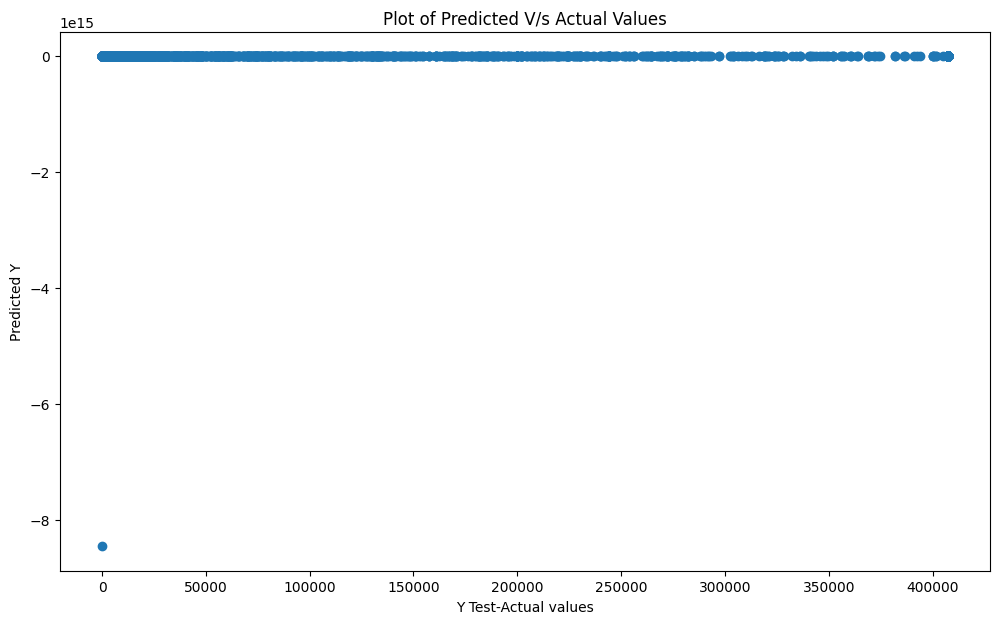

In [ ]:
plt.figure(figsize=(12,7))
plt.scatter(ytest,ypred)
plt.xlabel('Y Test-Actual values')
plt.ylabel('Predicted Y')
plt.title('Plot of Predicted V/s Actual Values')
plt.show()

In [145]:
ridge = Ridge()
ridge.fit(xtrain, ytrain)
ypred = ridge.predict(xtest)

In [146]:
ridge.score(xtest,ytest), ridge.score(xtrain,ytrain)

(0.9560940824163399, 0.9521746786897238)

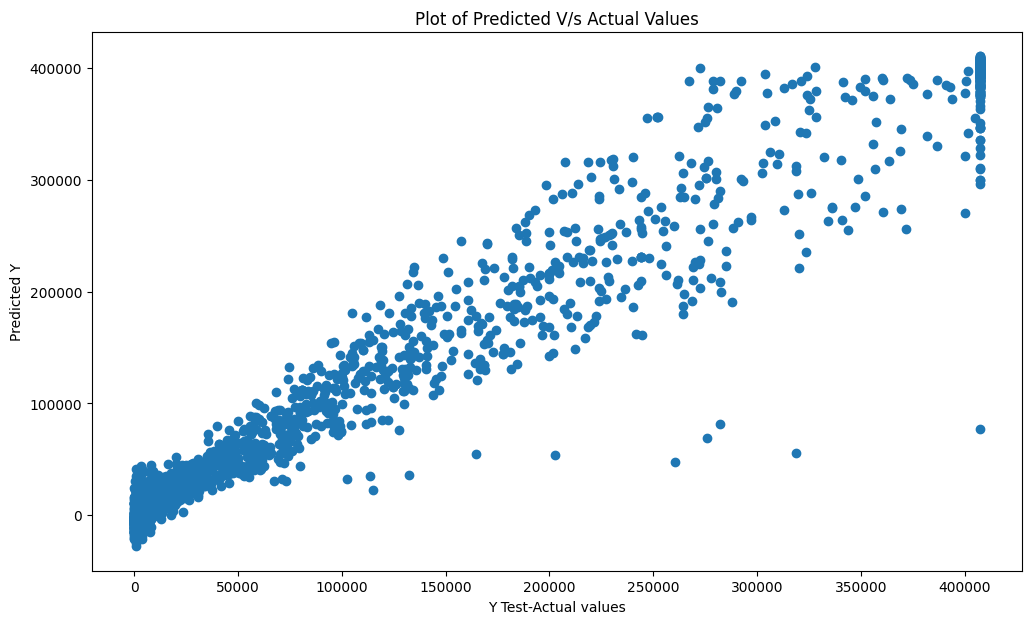

In [ ]:
plt.figure(figsize=(12,7))
plt.scatter(ytest,ypred)
plt.xlabel('Y Test-Actual values')
plt.ylabel('Predicted Y')
plt.title('Plot of Predicted V/s Actual Values')
plt.show()

In [163]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": xgb.XGBRegressor()
}

params = {
    "Linear Regression": {"n_jobs": -1},
    "Lasso": {"alpha": 0.5, "random_state": 42},
    "Ridge": {"alpha": 0.5, "random_state": 42},
    "Decision Tree": {"max_depth": 5, "random_state": 42},
    "Random Forest": {"n_estimators": 100, "max_depth": 5, "random_state": 42},
    "XGBoost": {"n_estimators": 100, "max_depth": 5, "random_state": 42}
}


In [164]:
def model_building(models, params):
    for key, model in models.items():
        model.set_params(**params[key])
        model.fit(xtrain, ytrain)
        ypred = model.predict(xtest)
        print(f"Model : {key}")
        print("R2 Score : ", r2_score(ytest, ypred))
        print("Mean Absolute Error : ", mean_absolute_error(ytest, ypred))
        print("Mean Squared Error : ", mean_squared_error(ytest, ypred))
        print("\n")
        plt.figure(figsize=(12,7))
        plt.scatter(ytest,ypred)
        plt.xlabel('Y Test-Actual values')
        plt.ylabel('Predicted Y')
        plt.title('Plot of Predicted V/s Actual Values')
        plt.show()

Model : Linear Regression
R2 Score :  -1.916356548407206e+18
Mean Absolute Error :  4177380588820.704
Mean Squared Error :  3.5319829092191413e+28




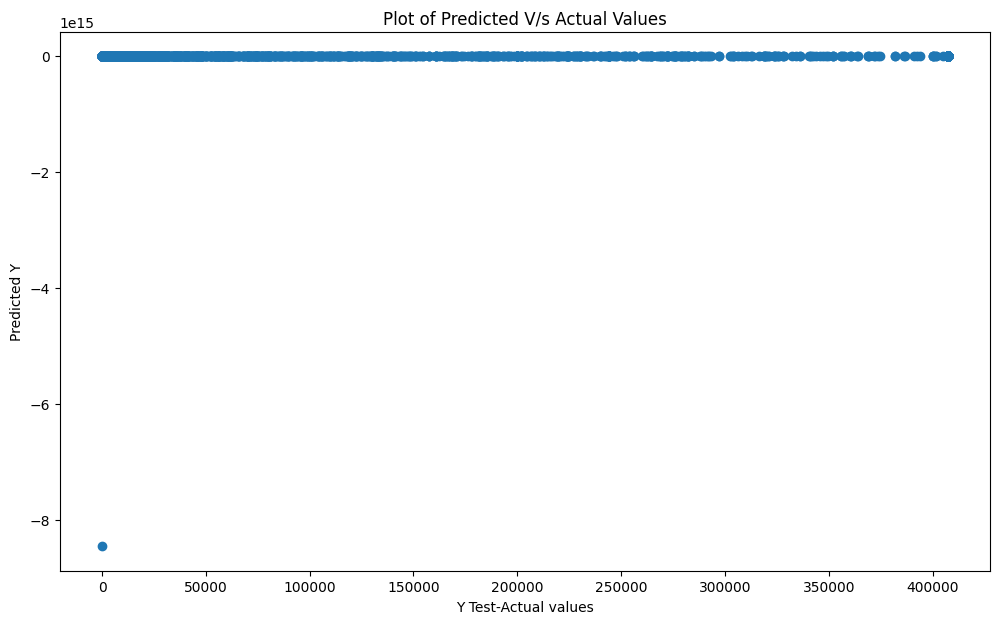

Model : Lasso
R2 Score :  0.9560935340538587
Mean Absolute Error :  16657.381609496406
Mean Squared Error :  809227737.1602721




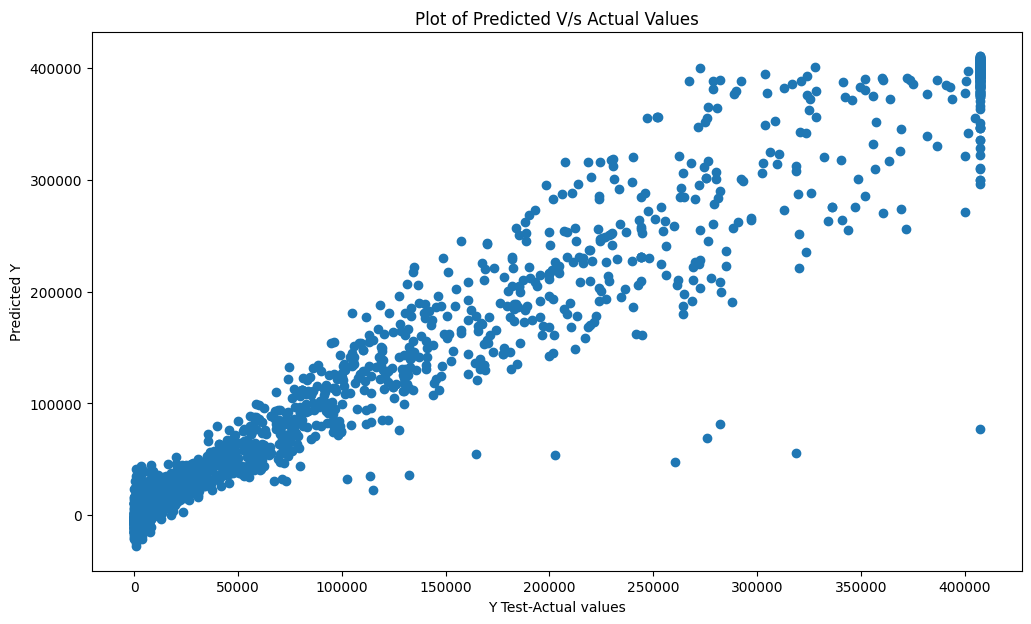

Model : Ridge
R2 Score :  0.9560941747085446
Mean Absolute Error :  16658.591020888507
Mean Squared Error :  809215929.4337648




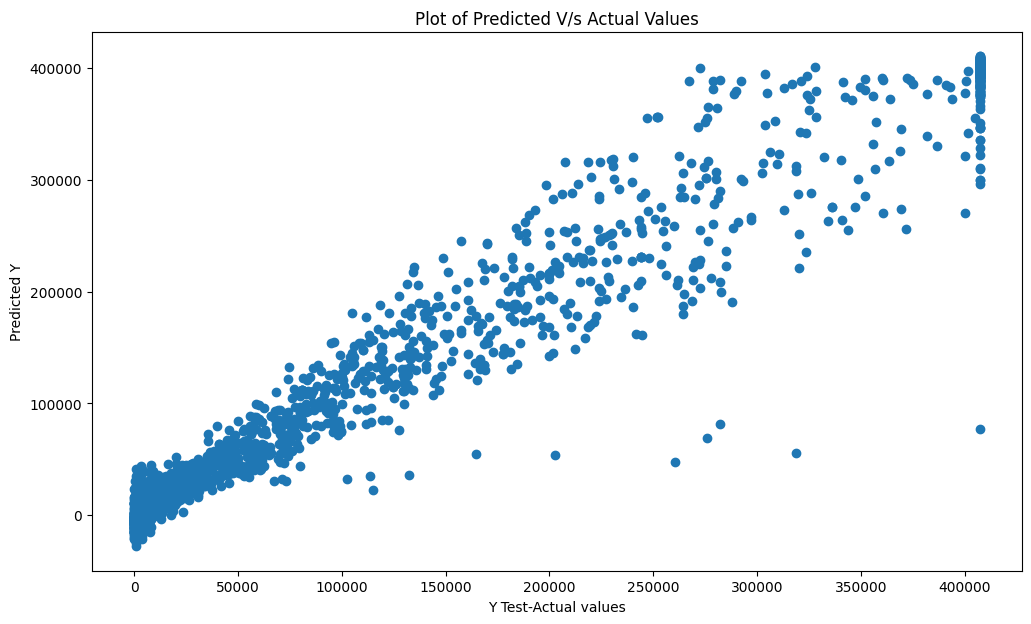

Model : Decision Tree
R2 Score :  0.9575101291966582
Mean Absolute Error :  14625.876328954886
Mean Squared Error :  783118870.1135355




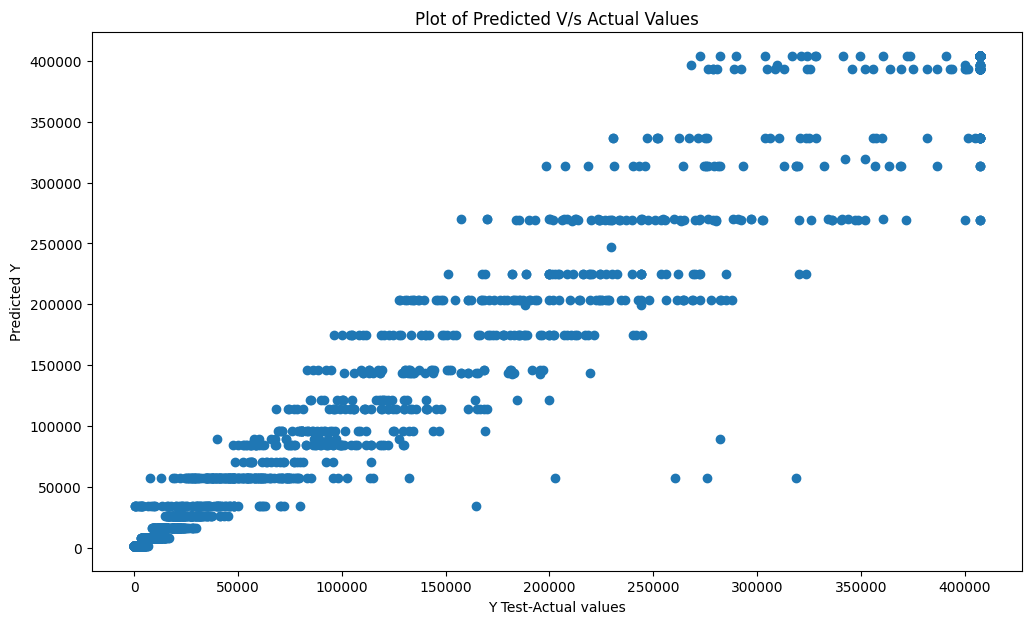

Model : Random Forest
R2 Score :  0.9653580009932576
Mean Absolute Error :  13330.03487991832
Mean Squared Error :  638476950.099379




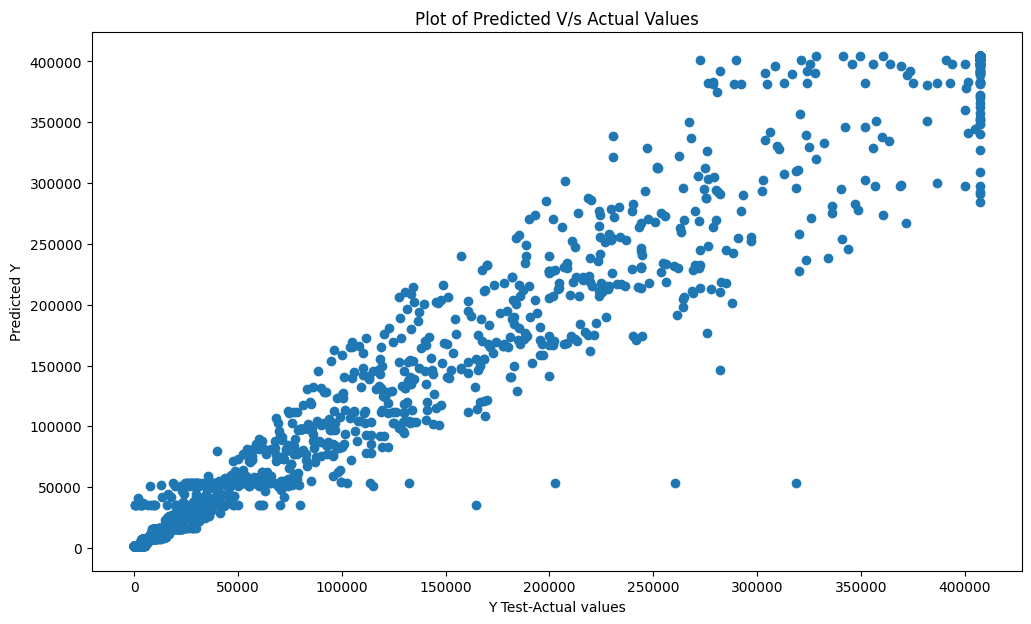

Model : XGBoost
R2 Score :  0.9916209974355544
Mean Absolute Error :  5770.190113678012
Mean Squared Error :  154431041.96096975




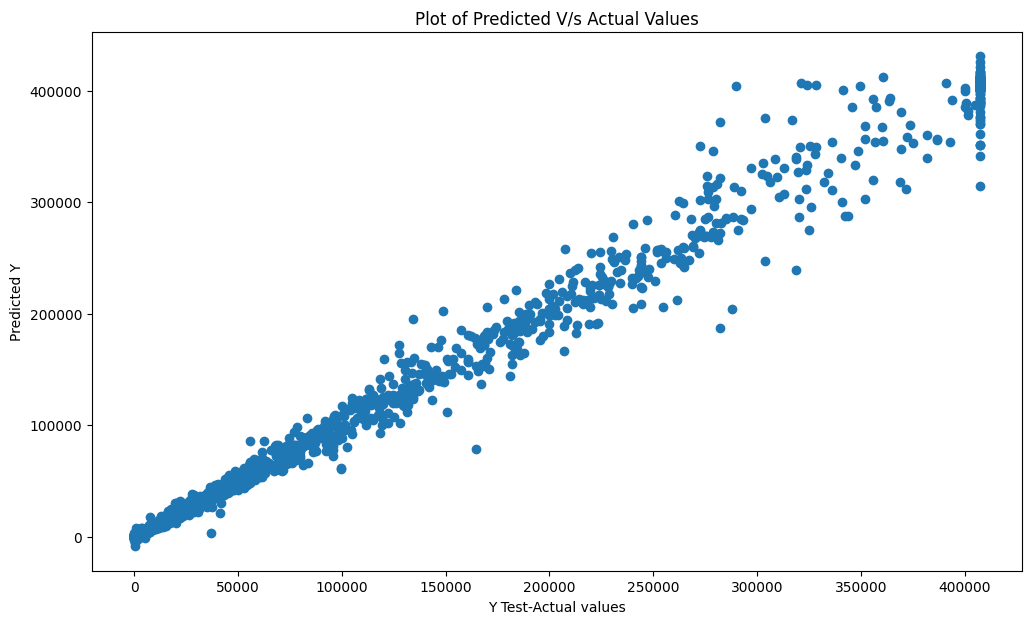

In [ ]:
model_building(models, params)